# Sommaire :


### <a href="#C1"> **Partie 1 : Contexte et Objectifs**</a>

 - Contexte
 - Objectifs

<b><hr></b>

### <a href="#C2"> **Partie 2 : Mise en place de l'espace de travail**</a>
 - <a href="#C21"> Import des packages</a>
 - <a href="#C22"> Repertoire de travail</a>
 - <a href="#C23"> Changement du répertoire courant</a>
 - <a href="#C24"> Import des datas frames</a>

<b><hr></b>

### <a href="#C3"> **Partie 3 : Analyse exploratoire et etude des jeux de données EDA**</a>
 - <a href="#C31"> Display</a>
 - <a href="#C32"> Structure du dataframes</a>
 - <a href="#C33"> Les valeurs manquantes et les doublons du dataframes</a>
 - <a href="#C34"> Data inspections</a>
 - <a href="#C35"> Data Visualisation Multivariée</a>
 - <a href="#C36"> Normalité </a>
    
<b><hr></b>
 
### <a href="#C4"> **Partie 4 : Cleaning**</a>
 - <a href="#C41"> Encoding object colonnes (LabelEncoding/OrdinalEncoder/OneHotEncoding)</a>
 - <a href="#C42"> Rename columns</a>
 - <a href="#C43"> Drop useless columns</a>
 - <a href="#C44"> Export csv</a>
 
<b><hr></b>

### <a href="#C5"> **Partie 5 : Conclusion**</a>


# <a name="C1">**Partie 1 : Contexte et Objectifs**</a> 

Contexte

Objectifs

# <a name="C2"><font color='blue'>**Partie 2 : Mise en place de l'espace de travail**</font></a> 

### <a name="C21"><font color='blue'>2.1 Imports packages</font></a> 

###### <b><font color='blue'>2.1.0 Requirements</font></b>
- <b>Built-in</b>       : os, warnings
- <b>Data</b>           : pandas, numpy
- <b>Visualisations</b> : matplotlib, seaborn
- <b>Preprocessing</b>  : sklearn, scipy

###### <b><font color='blue'>2.1.1 Imports</font></b>

In [1]:
# Built-in
import os, warnings , gc, time

# Data
import numpy as np
import pandas as pd

#Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

import missingno
import gc

In [2]:
%matplotlib inline
from pylab import rcParams
import warnings
rcParams['figure.figsize'] = 10, 6
warnings.filterwarnings('ignore')
sns.set(style = "darkgrid")

### <a name="C22"><font color='blue'>2.2 Working directory</font></a> 

In [3]:
os.listdir()

['.dockerignore',
 '.ipynb_checkpoints',
 '0_EDA.ipynb',
 'app.py',
 'data',
 'Dockerfile',
 'Instructions',
 'requirements.txt']

In [4]:
os.listdir('data/')

['exercice_data.csv',
 'LinearRegression_model.sav',
 'RandomForestRegressor_model.sav']

* ## Énoncé

Face à la chute du niveau scolaire constaté à la suite de la fermeture des écoles, le “Ministério da Educação” (Ministère de l'Éducation portugais) vous contacte, avec l'idée d'utiliser la data et l’IA pour tenter de remédier à la situation.

Le Ministère souhaiterait que les conseillers pédagogiques de chaque établissement puissent disposer d’un outil leur permettant de prioriser les élèves à accompagner. Pour cela, ils imaginent un dashboard qui permettrait de prioriser les élèves à accompagner en fonction de la complexité et de la valeur d’un tel accompagnement.

Ce dashboard pourrait par exemple se centrer autour d’un graphe permettant de visualiser l’ensemble des élèves de l’établissement suivant deux axes. Le premier axe présenterait la note actuelle de l’élève, indiquant ainsi l’intérêt qu’il y aurait à lui apporter un soutien personnalisé. Le deuxième axe permettrait d’évaluer la complexité d’accompagner l’élève pour améliorer son niveau scolaire (en se basant par exemple sur la présence d’indicateurs actionnables tels qu’un niveau d’absentéisme fort, la consommation d’alcool ou un temps d’étude hebdomadaire en dessous de la moyenne). 

Voici ce à quoi pourrait ressembler un tel dashboard (les élèves à aider en priorité correspondant aux points en haut à droite).

Il est bien sûr possible de proposer un autre type de visualisation si elle vous paraît plus pertinente que celle imaginée par le Ministère, et qu’elle n’est pas trop complexe à développer.


## Livrable attendu
Votre mission consiste à développer le code permettant de déployer une première version de cet outil sur l’infrastructure de l’établissement pilote. Cette première version devra être automatisable, pouvoir être déployée facilement et pouvoir être maintenue et améliorée dans le temps. 

Il n’est pas nécessaire de documenter l’outil ou de l’accompagner d’une présentation quelconque si son utilisation est suffisamment intuitive. Il n’est pas non plus demandé de trop s’attarder sur la partie front du dashboard, l’aspect visuel ou le contenu textuel. On pourra par exemple envisager d’utiliser des librairies telles que Streamlit, Dash ou Gradio.

Il n’est pas aussi utile de documenter l’approche imaginée pour la mise en place ou l’utilisation de l’outil. On pourra en discuter durant l’entretien.


### <a name="C23"><font color='blue'>2.3 Import DataFrames</font></a> 

In [5]:
path = 'data/exercice_data.csv'
df = pd.read_csv(path,index_col = 'StudentID', sep=',',encoding='latin1' )

# <a name="C3"><font color='teal'>**Partie 3 : Analyse exploratoire et etude des jeux de données EDA**</font></a> 

### <a name="C31"><font color='teal'>3.1 Display</font></a>

In [6]:
df.head().T

StudentID,0,1,2,3,4
FirstName,Rafael,Lara,Gonçalo,Lara,João
FamilyName,Morais,Braga,Azevedo,Perna,Pires
sex,F,F,F,F,F
age,18,17,15,15,16
address,U,U,U,U,U
famsize,GT3,GT3,LE3,GT3,GT3
Pstatus,A,T,T,T,T
Medu,4,1,1,4,3
Fedu,4,1,1,2,3
Mjob,at_home,at_home,at_home,health,other


●	StudentID - a unique ID identifying each student </Br>
●	sex - student's sex (binary: 'F' - female or 'M' - male)</Br>
●	age - student's age (numeric: from 15 to 22)</Br>
●	address - student's home address type (binary: 'U' - urban or 'R' - rural)</Br>
●	famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)</Br>
●	Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)</Br>
●	Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)</Br>
●	Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)</Br>
●	Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')</Br>
●	Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')</Br>
●	reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')</Br>
●	guardian - student's guardian (nominal: 'mother', 'father' or 'other')</Br>
●	traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)</Br>
●	studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)</Br>
●	failures - number of past class failures (numeric: n if 1 <= n < 3, else 4)</Br>
●	schoolsup - extra educational support (binary: yes or no)</Br>
●	famsup - family educational support (binary: yes or no)</Br>
●	paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)</Br>
●	activities - extracurricular activities (binary: yes or no)</Br>
●	nursery - attended nursery school (binary: yes or no)</Br>
●	higher - wants to take higher education (binary: yes or no)</Br>
●	internet - Internet access at home (binary: yes or no)</Br>
●	romantic - with a romantic relationship (binary: yes or no)</Br>
●	famrel - qualfreetime - free time after school (numeric: from 1 - very low to 5 - very high)</Br>
●	ity of family relationships (numeric: from 1 - very bad to 5 - excellent)</Br>
●	freetime - free time after school (numeric: from 1 - very low to 5 - very high)</Br>
●	goout - going out with friends (numeric: from 1 - very low to 5 - very high)</Br>
●	Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)</Br>
●	Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)</Br>
●	health - current health status (numeric: from 1 - very bad to 5 - very good)</Br>
●	absences - number of school absences (numeric: from 0 to 93)</Br>
●	FinalGrade - final grade in mathematics (numeric: from 0 to 20, output target)</Br>

<div class="alert alert-info">Toutes les variables sont des variables catégorielles sauf <B>age,absences et FinalGrade.</div>

<div class="alert alert-success">Cependant toutes les données sont des données ordinales.</div>

In [7]:
# sort df by 'FinalGrade'
df.sort_values(by='FinalGrade',inplace=True)
df_cleaned = df.copy(deep= True)

In [8]:
# liste de colonnes numeriques
colNumToConvert = [x for x in df_cleaned.columns if x not in ["age","absences","FinalGrade"]]

# Appliquer astype('object') sur les colonnes spécifiées
df[colNumToConvert] = df[colNumToConvert].astype('object')

In [9]:
df.columns

Index(['FirstName', 'FamilyName', 'sex', 'age', 'address', 'famsize',
       'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
       'FinalGrade'],
      dtype='object')

In [10]:
df_cleaned.tail().T

StudentID,8,110,113,286,47
FirstName,Lucas,Leonor,Afonso,Matilde,Tomás
FamilyName,Neves,Arvelo,Natal,Sarmento,Fosco
sex,M,M,M,F,M
age,15,15,15,18,16
address,U,U,U,U,U
famsize,LE3,LE3,LE3,GT3,GT3
Pstatus,A,A,T,T,T
Medu,3,4,4,2,4
Fedu,2,4,2,2,3
Mjob,services,teacher,teacher,at_home,health


In [11]:
df.sample(5).T

StudentID,366,224,83,214,376
FirstName,Duarte,Sofia,Clara,Salvador,Madalena
FamilyName,Paulino,Aparicio,Fidalgo,Joaquim,Quintela
sex,M,F,M,F,F
age,18,16,15,17,20
address,U,U,U,R,U
famsize,LE3,GT3,LE3,LE3,GT3
Pstatus,T,T,T,T,T
Medu,4,4,2,4,4
Fedu,4,4,2,4,2
Mjob,teacher,teacher,services,services,health


### <a name="C32"><font color='teal'>3.2 Structure du dataframe</font></a> 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 357 entries, 216 to 47
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   FirstName   357 non-null    object
 1   FamilyName  357 non-null    object
 2   sex         357 non-null    object
 3   age         357 non-null    int64 
 4   address     357 non-null    object
 5   famsize     357 non-null    object
 6   Pstatus     357 non-null    object
 7   Medu        357 non-null    object
 8   Fedu        357 non-null    object
 9   Mjob        357 non-null    object
 10  Fjob        357 non-null    object
 11  reason      357 non-null    object
 12  guardian    357 non-null    object
 13  traveltime  357 non-null    object
 14  studytime   357 non-null    object
 15  failures    357 non-null    object
 16  schoolsup   357 non-null    object
 17  famsup      357 non-null    object
 18  paid        357 non-null    object
 19  activities  357 non-null    object
 20  nursery     35

In [13]:
df.dtypes.value_counts()

object    29
int64      3
Name: count, dtype: int64

In [14]:
df_cleaned.dtypes.value_counts()

object    18
int64     14
Name: count, dtype: int64

In [15]:
# Modification directe de l'attribut
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df.nunique()

FirstName      40
FamilyName    355
sex             2
age             8
address         2
famsize         2
Pstatus         2
Medu            5
Fedu            5
Mjob            5
Fjob            5
reason          4
guardian        3
traveltime      4
studytime       4
failures        4
schoolsup       2
famsup          2
paid            2
activities      2
nursery         2
higher          2
internet        2
romantic        2
famrel          5
freetime        5
goout           5
Dalc            5
Walc            5
health          5
absences       34
FinalGrade     17
dtype: int64

### <a name="C33"><font color='teal'>3.3 Les valeurs manquantes et les doublons du dataframes</font></a> 

#### <font color='teal'>3.3.a Analyse des doublons du dataframes</font>

In [16]:
print("Il y a {} lignes dupliquées".format(df.duplicated().sum()))

Il y a 0 lignes dupliquées


In [17]:
print("Il y a {} lignes dupliquées".format( df.duplicated().sum() ))
print("Il y a {} clés primaires dupliquées".format( df.reset_index()["StudentID"].duplicated().sum() ))
print("Il y a {} lignes dupliquées".format( df.reset_index().drop(columns = ["StudentID","FirstName","FamilyName"]).duplicated().sum() ))

Il y a 0 lignes dupliquées
Il y a 0 clés primaires dupliquées
Il y a 0 lignes dupliquées


#### <font color='teal'>3.3.b Analyse et Traitement des valeurs manquantes du dataframes</font>

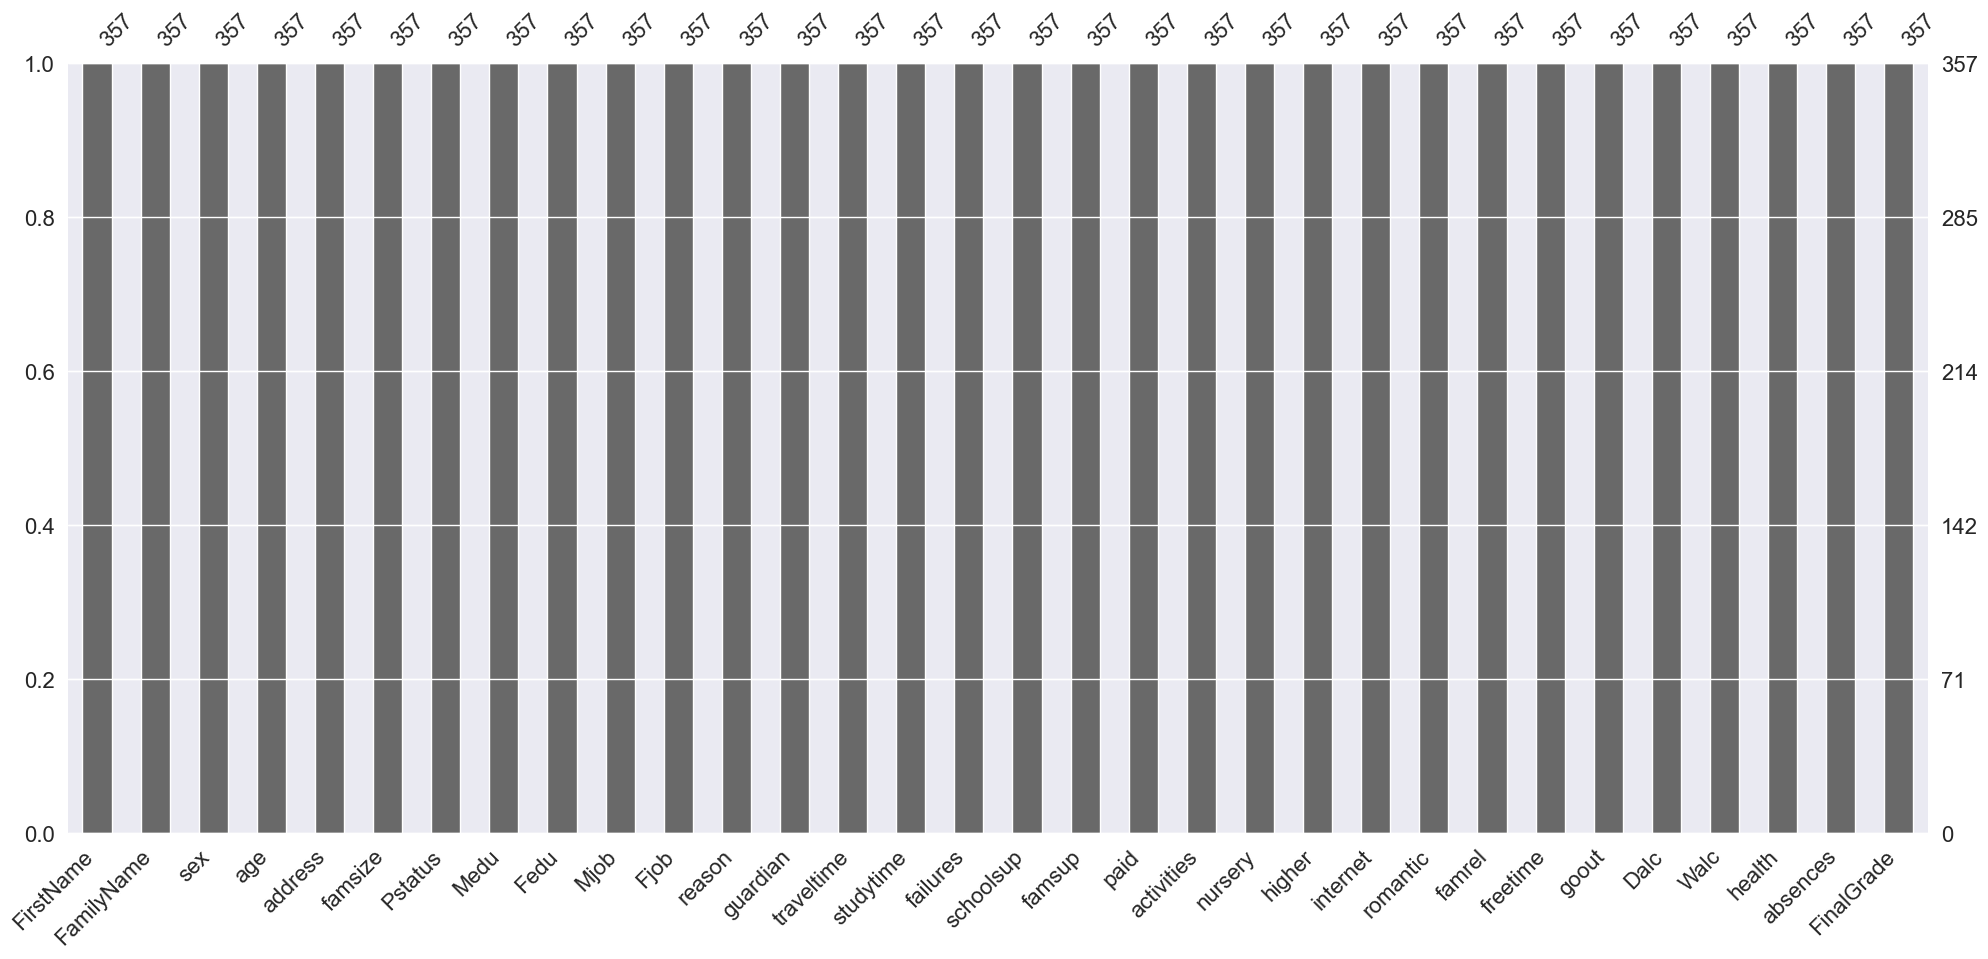

In [18]:
#les variables misc_data
try:
    import missingno as msno
    msno.bar(df)
except:
    print('some errors!!!!');

### <a name="C34"><font color='teal'>3.4 Data inspections</font></a> 

In [19]:
# variables numeriques
df.describe(include = [np.number]) 

,age,absences,FinalGrade
count,357.000000,357.000000,357.000000
mean,16.655462,6.316527,11.523810
std,1.268262,8.187623,3.227797
min,15.000000,0.000000,4.000000
25%,16.000000,2.000000,9.000000
50%,17.000000,4.000000,11.000000
75%,18.000000,8.000000,14.000000
max,22.000000,75.000000,20.000000


In [20]:
# variables catégorielles
df.describe(exclude = [np.number]).T #/include = [objet]/["category"]

,count,unique,top,freq
FirstName,357,40,Rafael,20
FamilyName,357,355,Ramires,2
sex,357,2,F,185
address,357,2,U,279
famsize,357,2,GT3,250
Pstatus,357,2,T,318
Medu,357,5,4,125
Fedu,357,5,2,102
Mjob,357,5,other,127
Fjob,357,5,other,196


#### <font color='teal'> - 3.4.1 Data target </font>

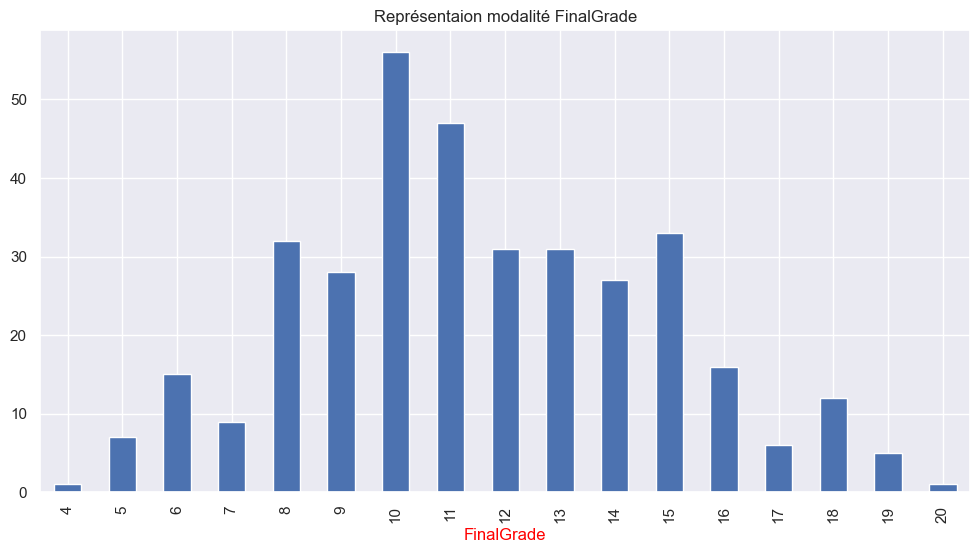

In [21]:
# diagramme en  Camembert
fig, axes = plt.subplots(nrows=1, ncols=1,  figsize=(12, 6))

axes.set_title('Représentaion modalité FinalGrade')
df['FinalGrade'].value_counts().sort_index().plot(kind='bar',ax =  axes,label = '')
axes.xaxis.label.set_color('red')

### <a name="C35"><font color='teal'>3.5 Data Visualisation Multivariée</font></a> 

In [22]:
# Conversion de la target en variable qualitative
seuil = [0,5,10,15,20] 
df_cleaned['FGradebins'] = pd.cut(df_cleaned["FinalGrade"], bins=seuil )

# Convertir les intervalles en catégories discrètes
df_cleaned["FGradebins"] = df_cleaned["FGradebins"].astype(str)
#df_cleaned.FGradebins

In [23]:
df_cleaned.FGradebins

StudentID
216      (0, 5]
384      (0, 5]
18       (0, 5]
79       (0, 5]
373      (0, 5]
100      (0, 5]
72       (0, 5]
248      (0, 5]
0       (5, 10]
234     (5, 10]
86      (5, 10]
220     (5, 10]
45      (5, 10]
203     (5, 10]
177     (5, 10]
35      (5, 10]
67      (5, 10]
103     (5, 10]
7       (5, 10]
386     (5, 10]
92      (5, 10]
82      (5, 10]
1       (5, 10]
206     (5, 10]
209     (5, 10]
49      (5, 10]
89      (5, 10]
164     (5, 10]
161     (5, 10]
225     (5, 10]
381     (5, 10]
392     (5, 10]
85      (5, 10]
210     (5, 10]
99      (5, 10]
192     (5, 10]
106     (5, 10]
183     (5, 10]
180     (5, 10]
118     (5, 10]
330     (5, 10]
353     (5, 10]
124     (5, 10]
350     (5, 10]
155     (5, 10]
352     (5, 10]
213     (5, 10]
307     (5, 10]
217     (5, 10]
261     (5, 10]
255     (5, 10]
253     (5, 10]
252     (5, 10]
250     (5, 10]
247     (5, 10]
297     (5, 10]
278     (5, 10]
388     (5, 10]
25      (5, 10]
24      (5, 10]
218     (5, 10]
280     (5, 10

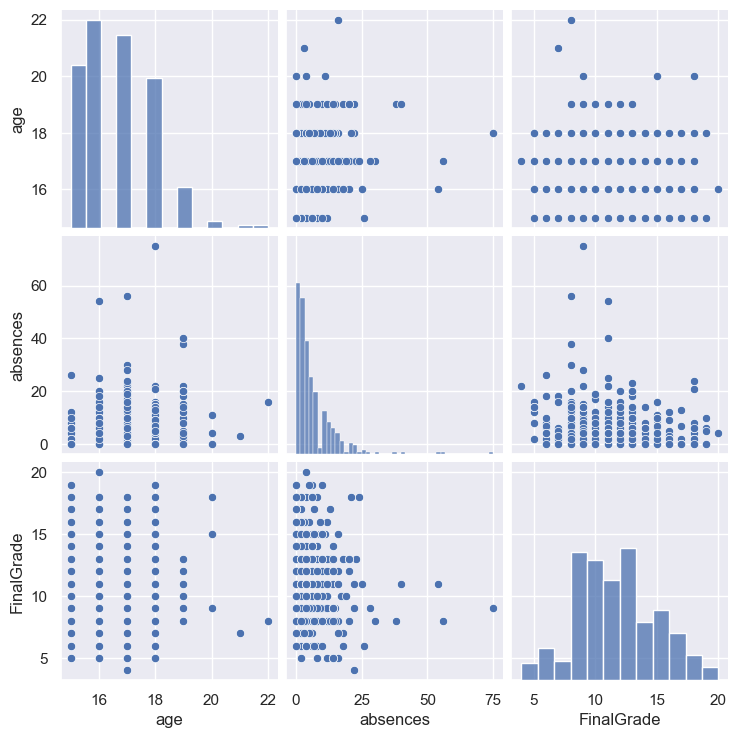

In [24]:
sns.pairplot(data = df.select_dtypes(include=[np.number]) );

CPU times: total: 93.8 ms
Wall time: 91 ms


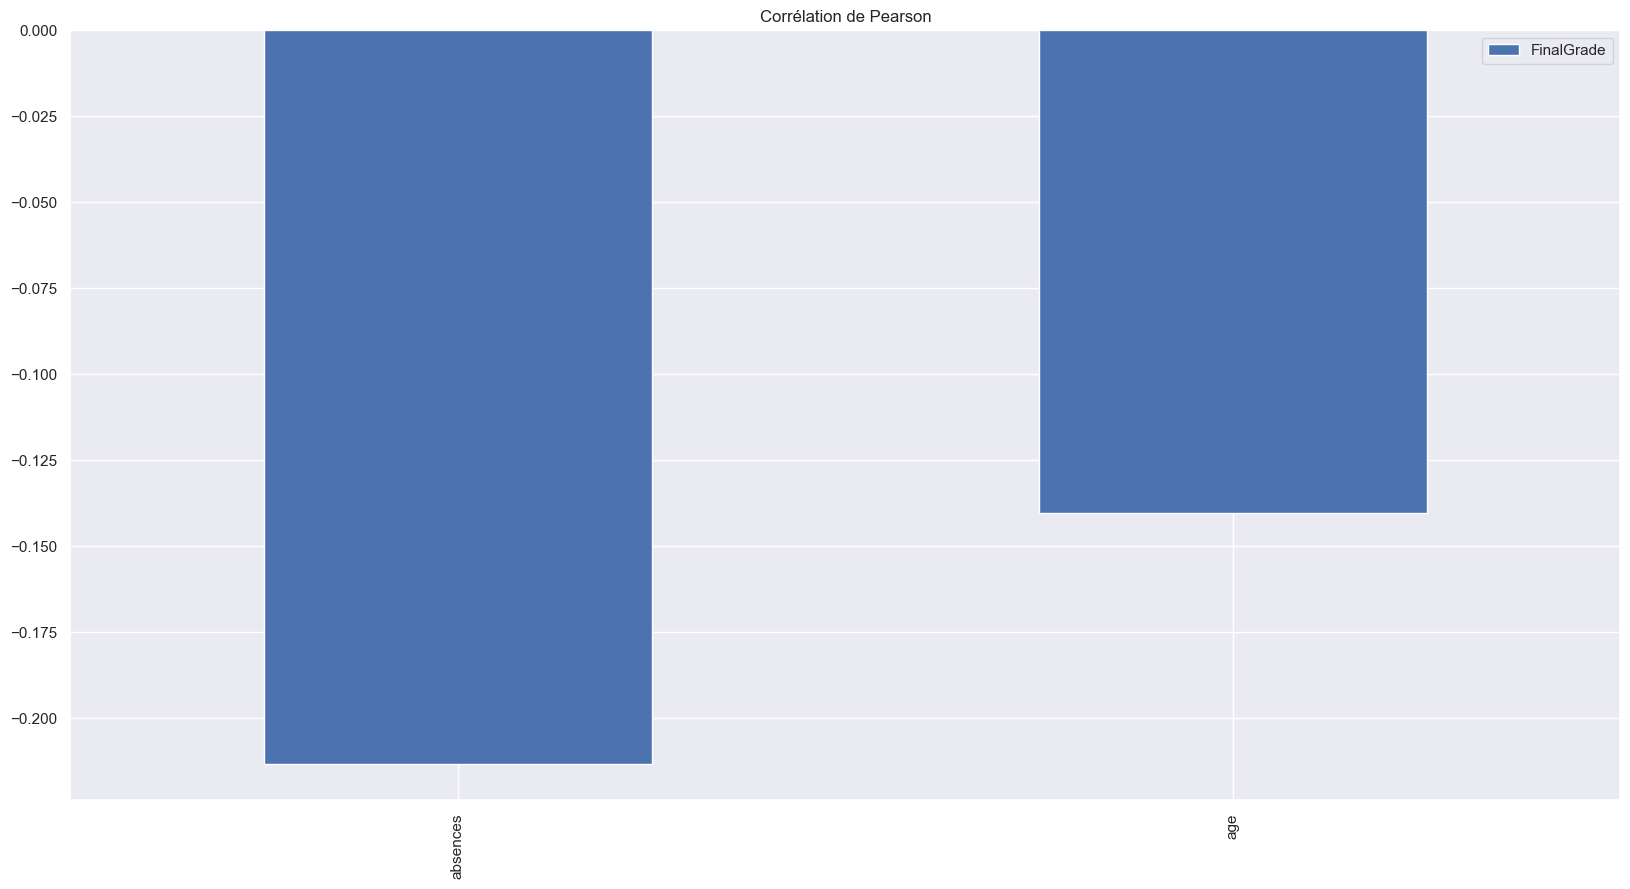

In [25]:
%%time
plt.figure(figsize=(20,10))
ax1 = plt.subplot(1, 1, 1)
df.select_dtypes(include=[np.number]).corr()[['FinalGrade']].sort_index()\
.drop(['FinalGrade']).plot(kind='bar',ax = ax1)
ax1.set_title("Corrélation de Pearson");

#### <font color='teal'> - 3.5.1 Data numerique</font>

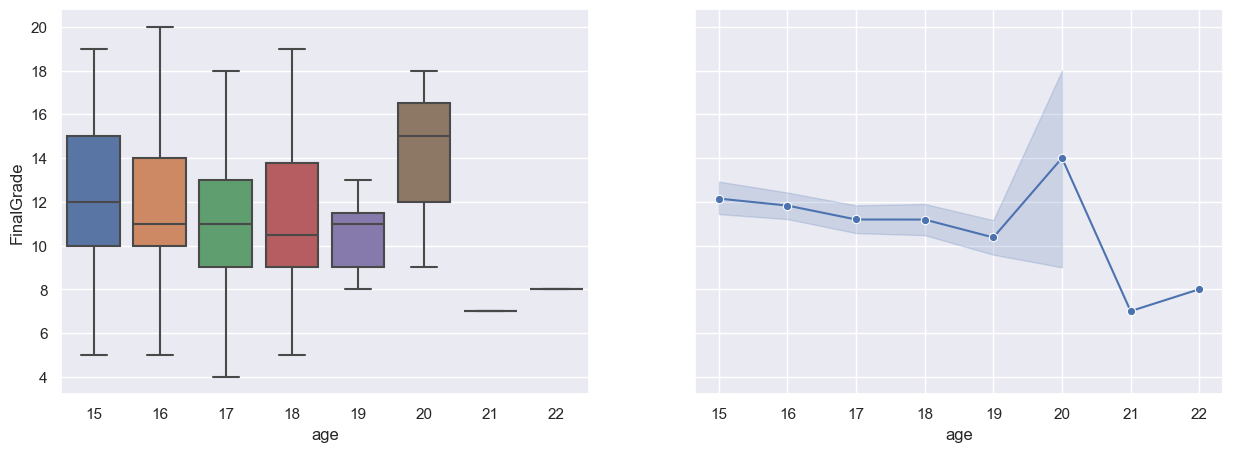

In [26]:
fig,axes =plt.subplots(nrows = 1,ncols= 2 ,figsize=(15,5),sharey=True)
sns.boxplot(x='age',  y='FinalGrade',  data=df, ax= axes[0])
sns.lineplot(x='age', y='FinalGrade',marker='o', data=df, ax= axes[1]);

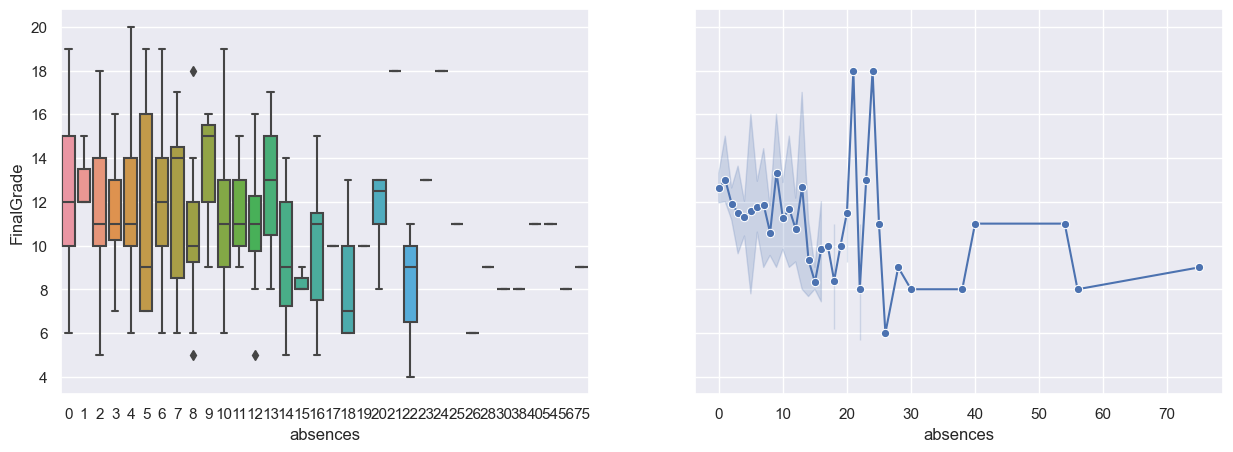

In [27]:
fig,axes =plt.subplots(nrows = 1,ncols= 2 ,figsize=(15,5),sharey=True)
sns.boxplot(x='absences',  y='FinalGrade',  data=df, ax= axes[0])
sns.lineplot(x='absences', y='FinalGrade',marker='o', data=df, ax= axes[1]);

#### <font color='teal'> - 3.5.2 Data Categorielle</font>

In [28]:
def plot_categorical_feature(feature, df = None, orientation_horizontal = True):

    temp = df[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,"Nbre of students": temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = df[[feature, 'FinalGrade']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='FinalGrade', ascending=False, inplace=True)
    df1 = df1.merge(cat_perc, on=feature)
    
    sns.set_color_codes("colorblind")
    
    fig,axes =plt.subplots(nrows = 1,ncols= 2 ,figsize=(15,5),sharey=True)
    sns.barplot(y = feature, x="Nbre of students",data=df1, ax= axes[0])
    sns.barplot(y = feature, x='FinalGrade', data=df1, ax= axes[1])
    axes[0].tick_params(axis='x', rotation=45)
    axes[1].tick_params(axis='x', rotation=45)
    plt.xlabel('Grade moyen obtenu', fontsize=12)

    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.subplots_adjust(wspace = 0.6)
    plt.show();

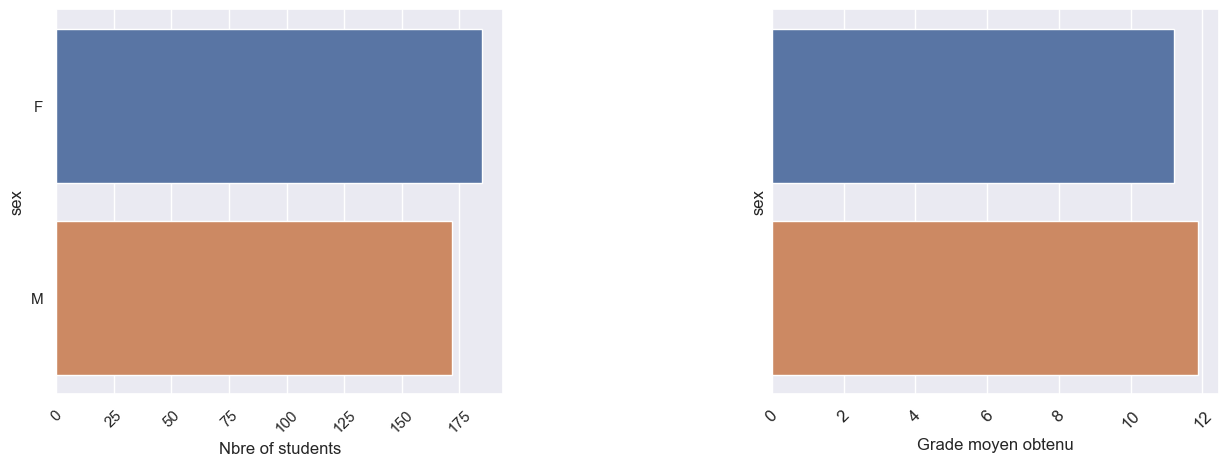

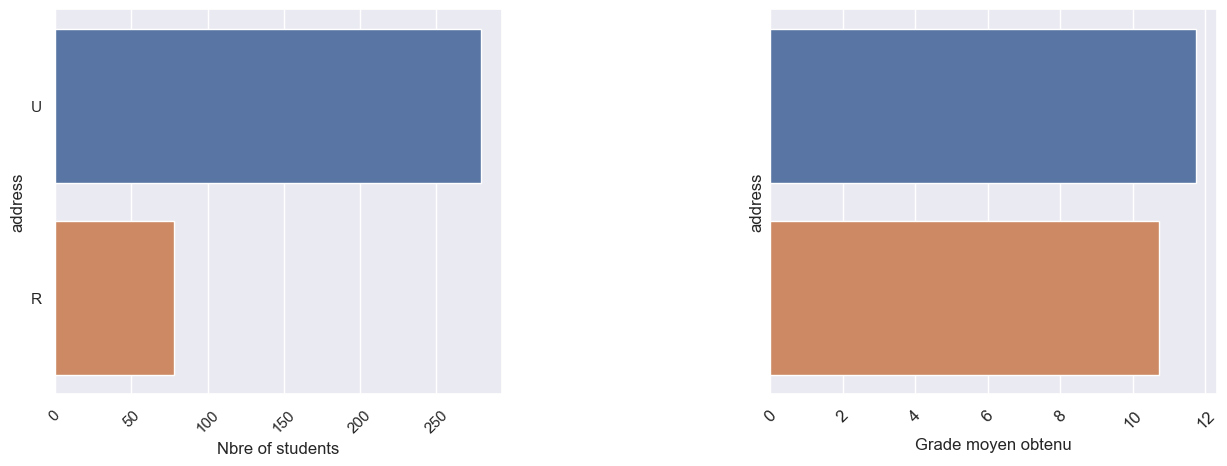

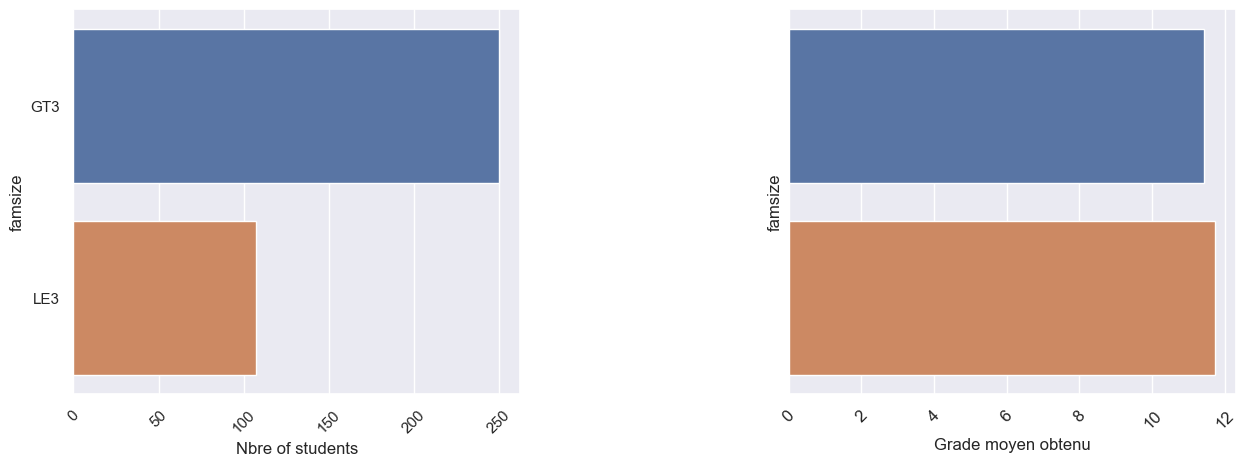

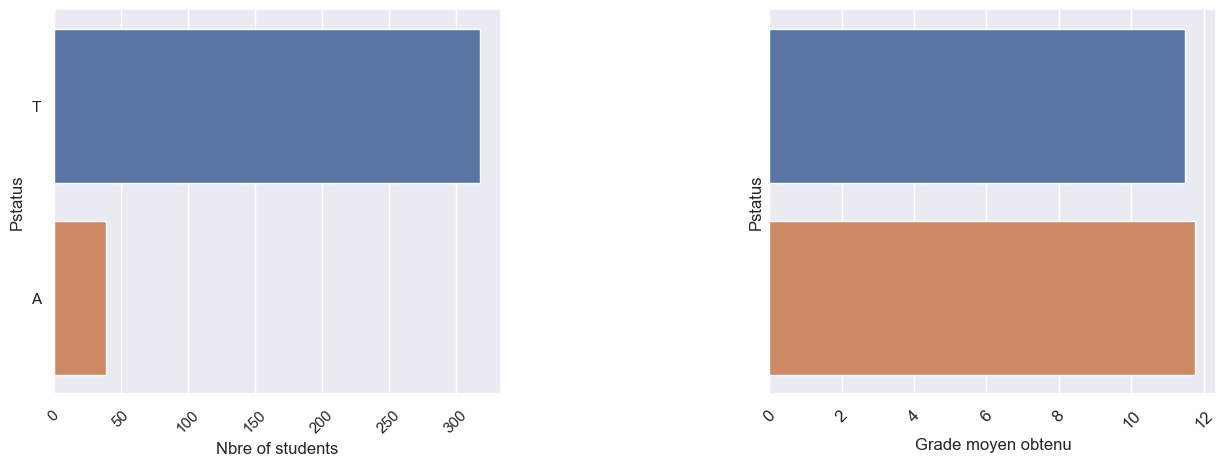

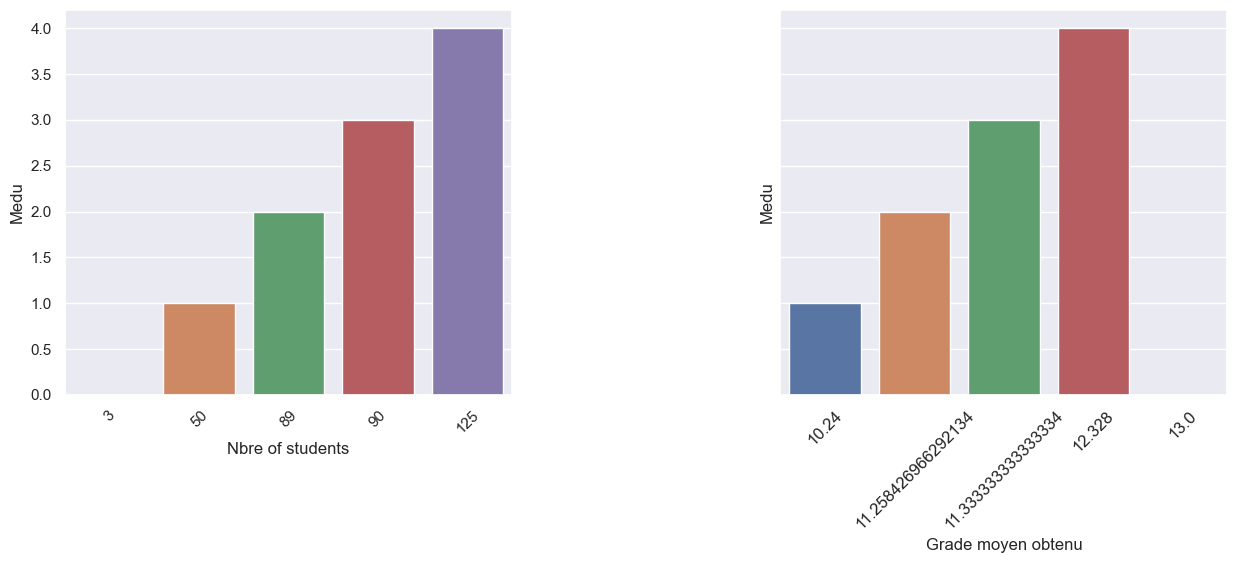

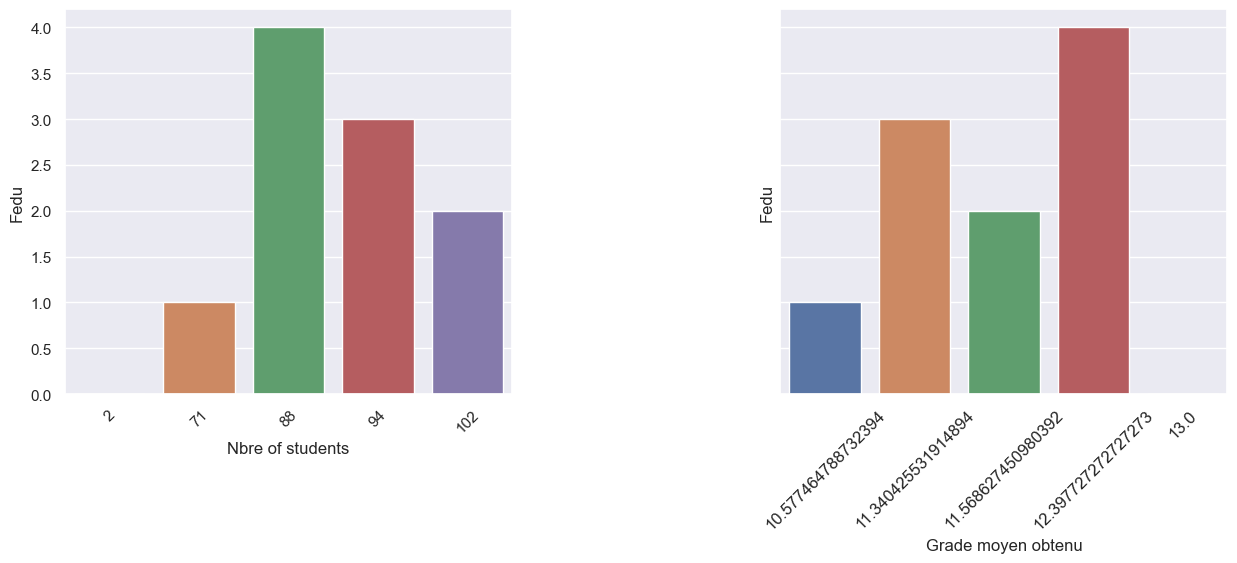

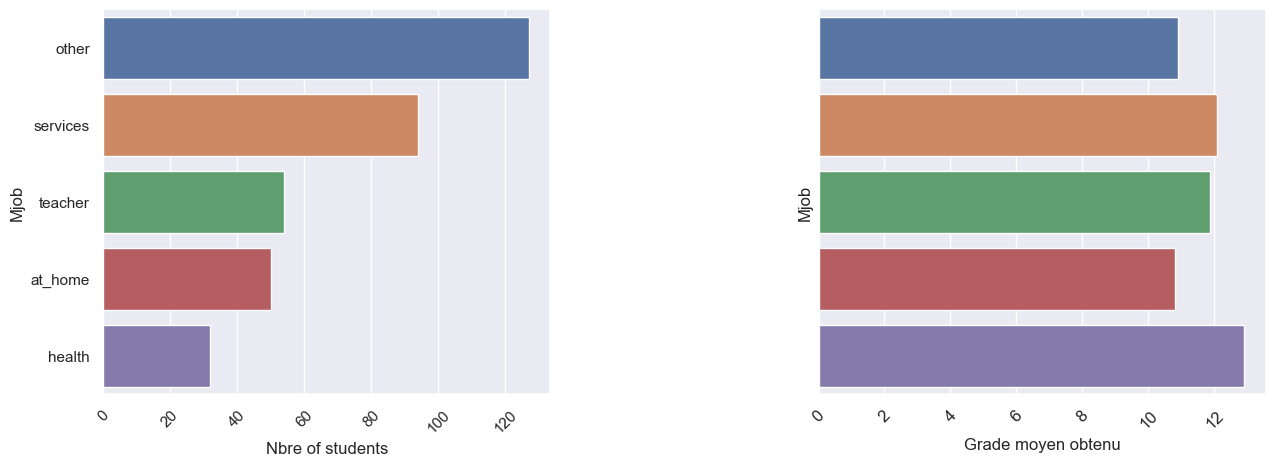

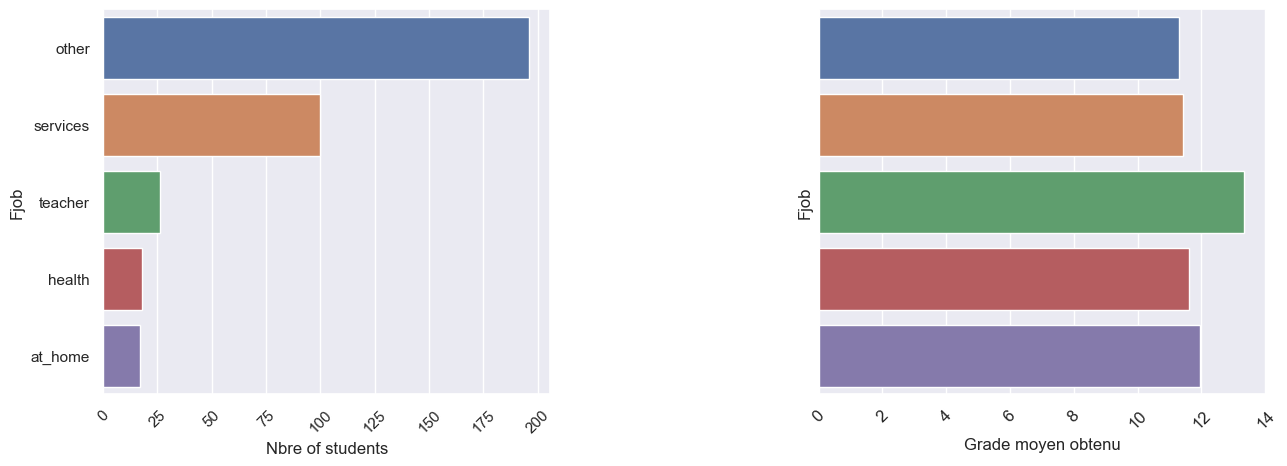

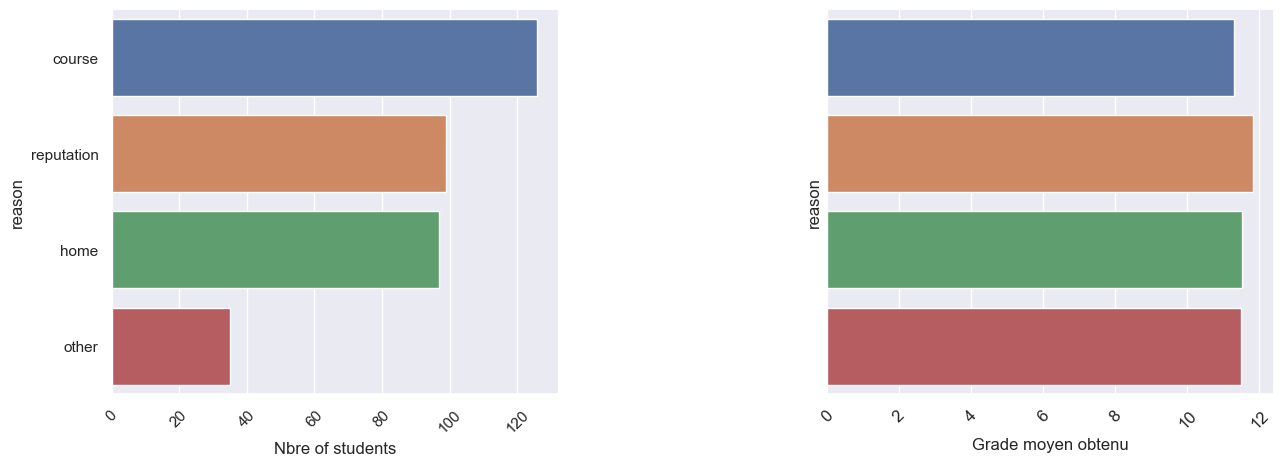

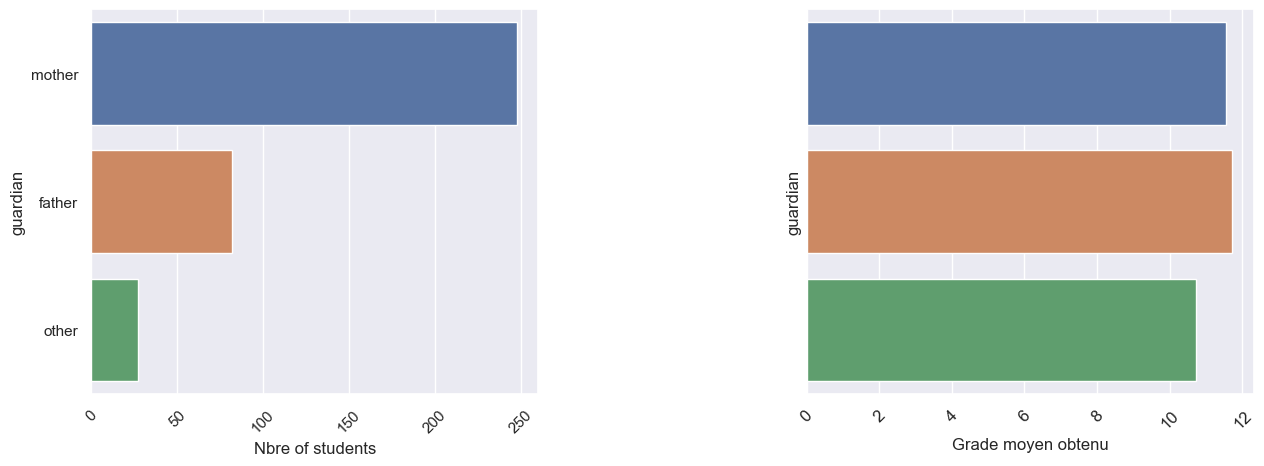

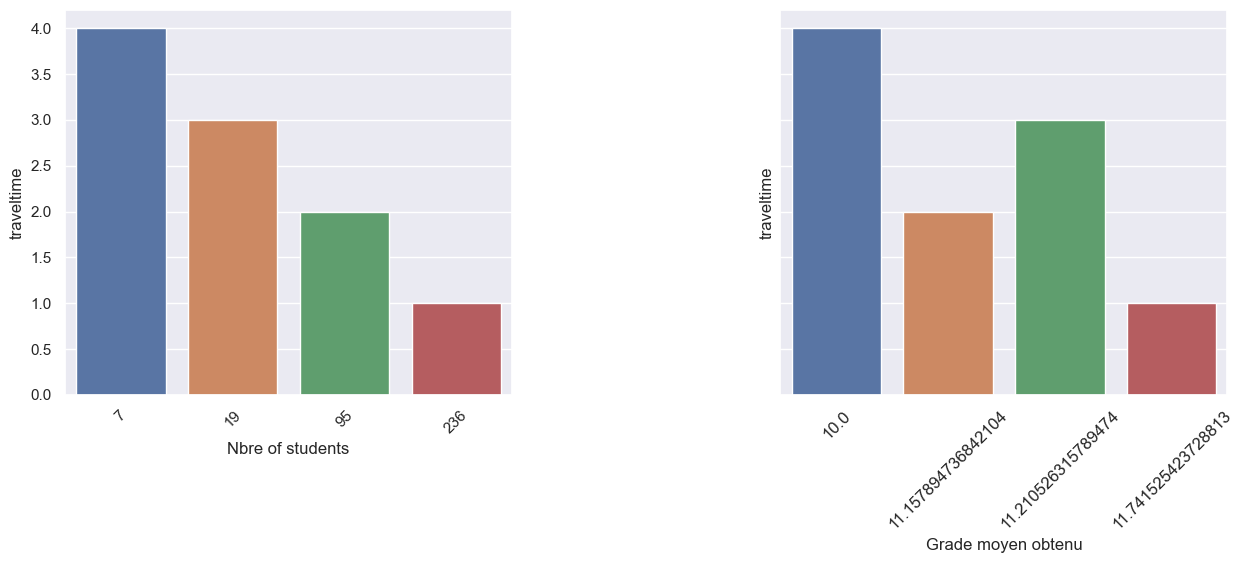

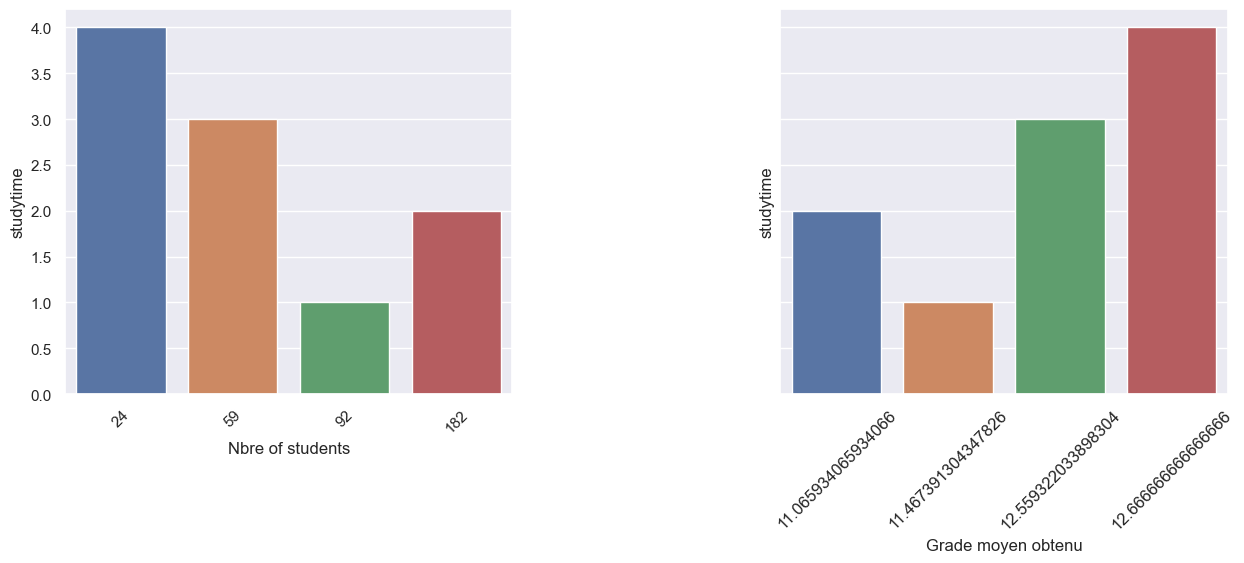

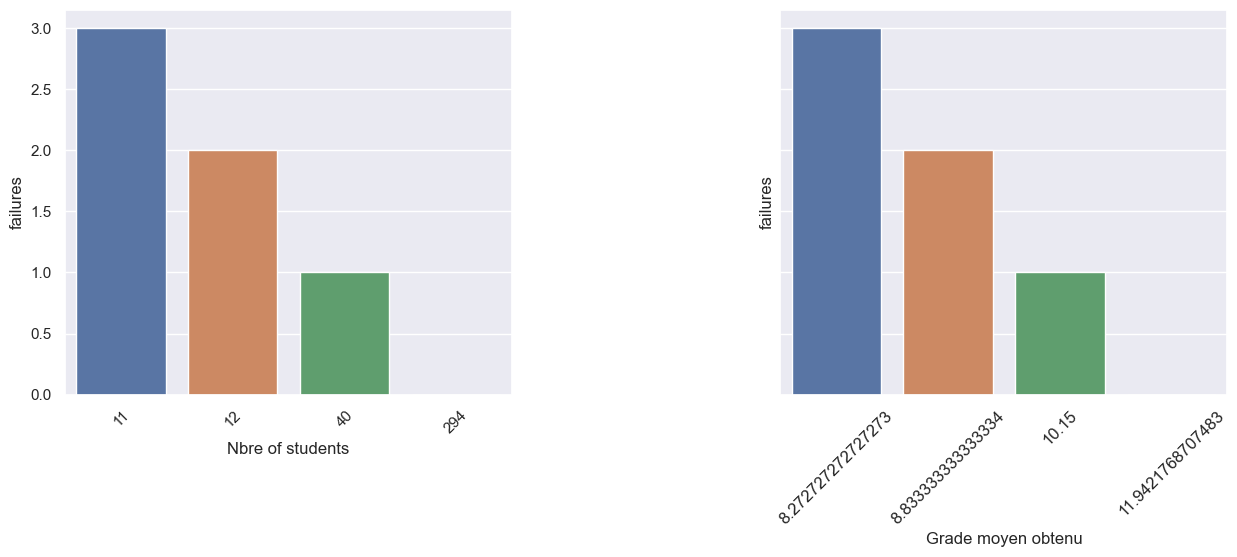

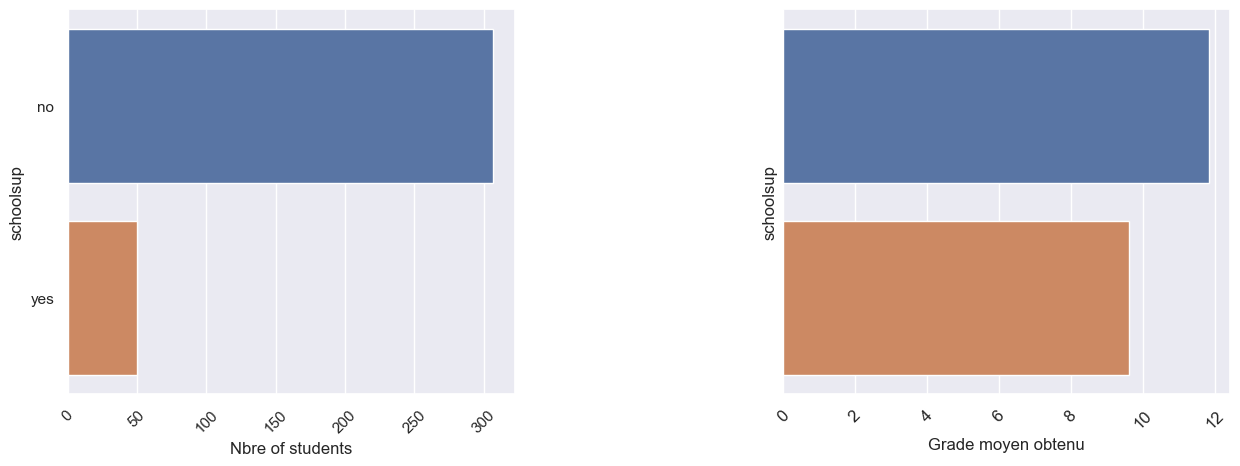

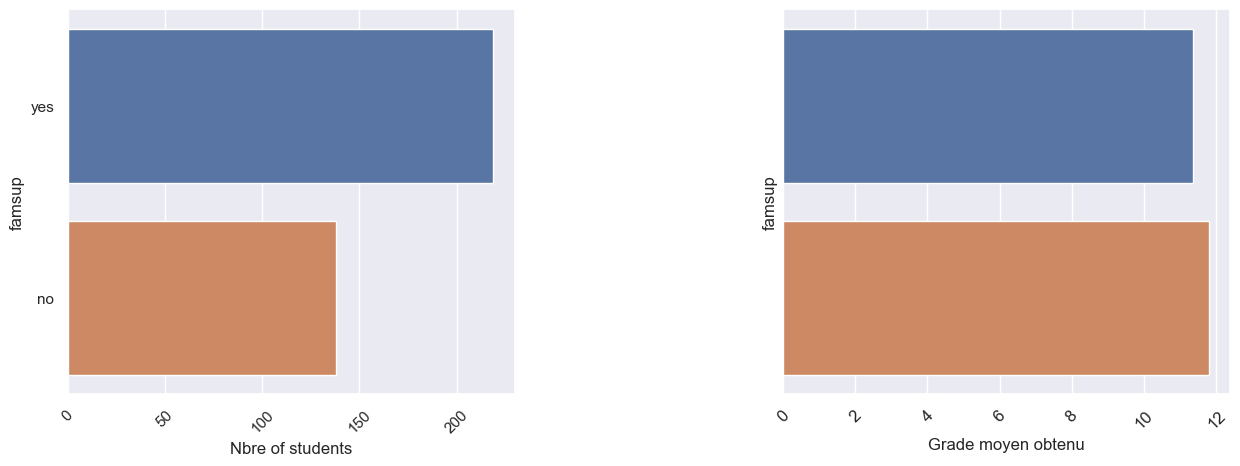

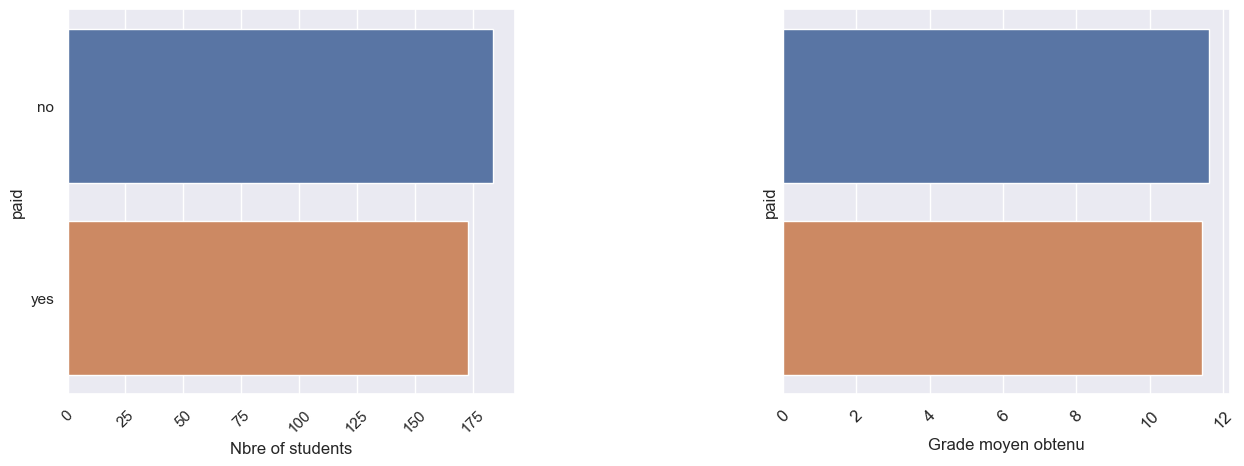

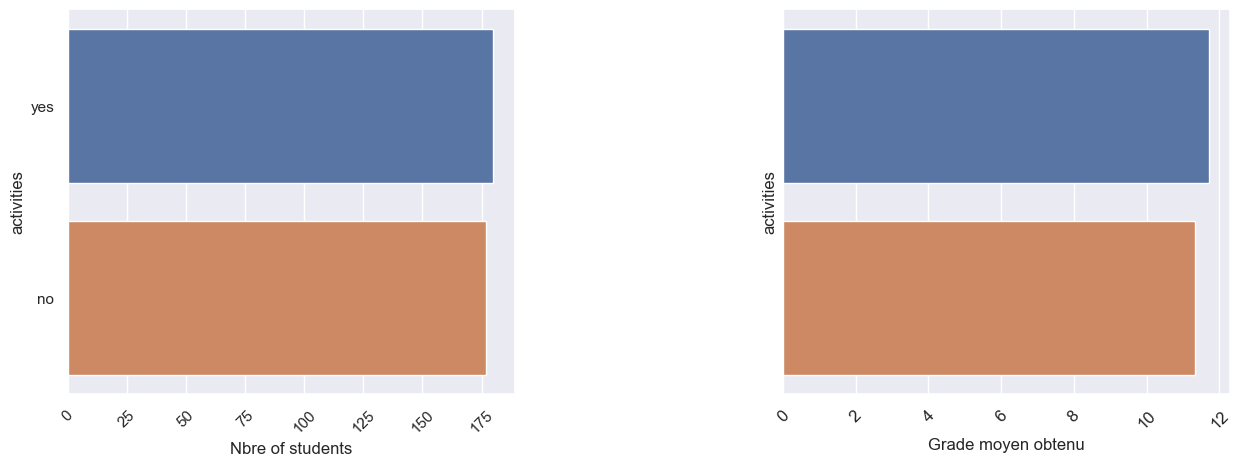

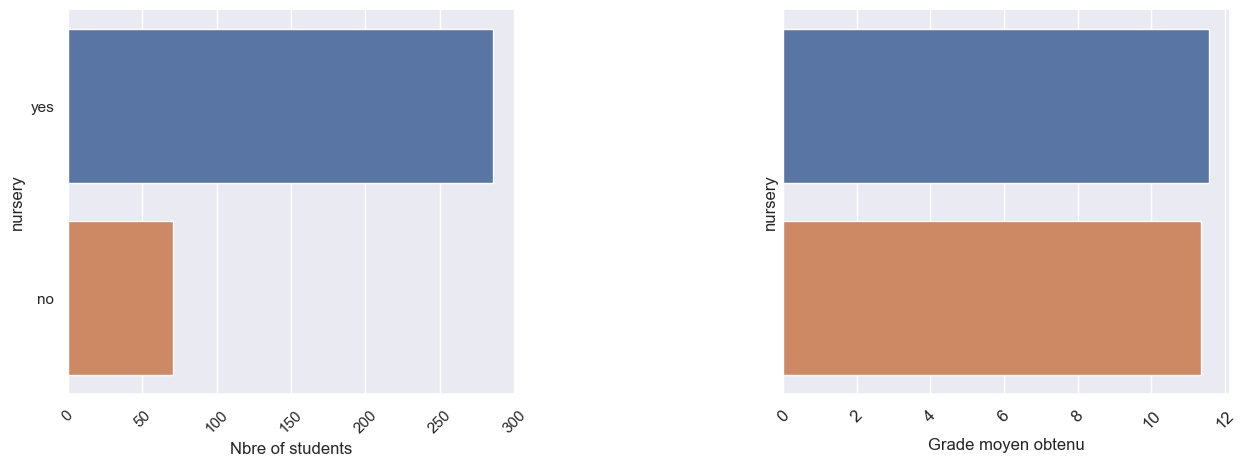

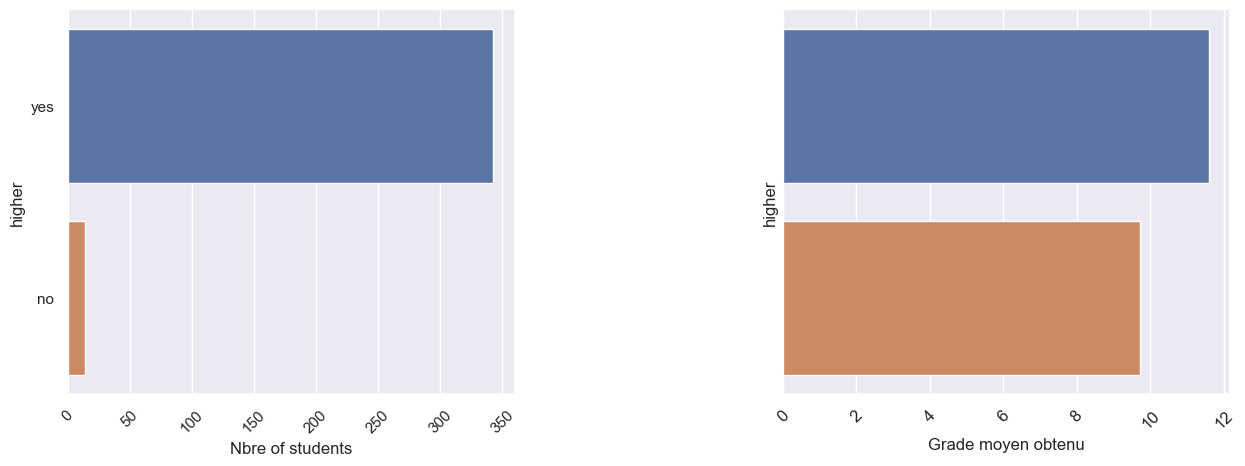

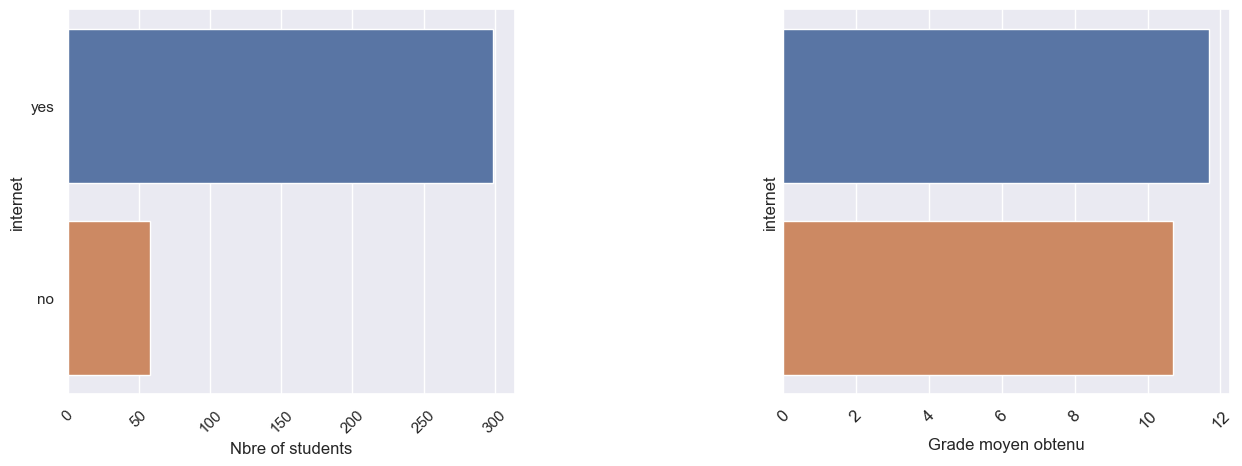

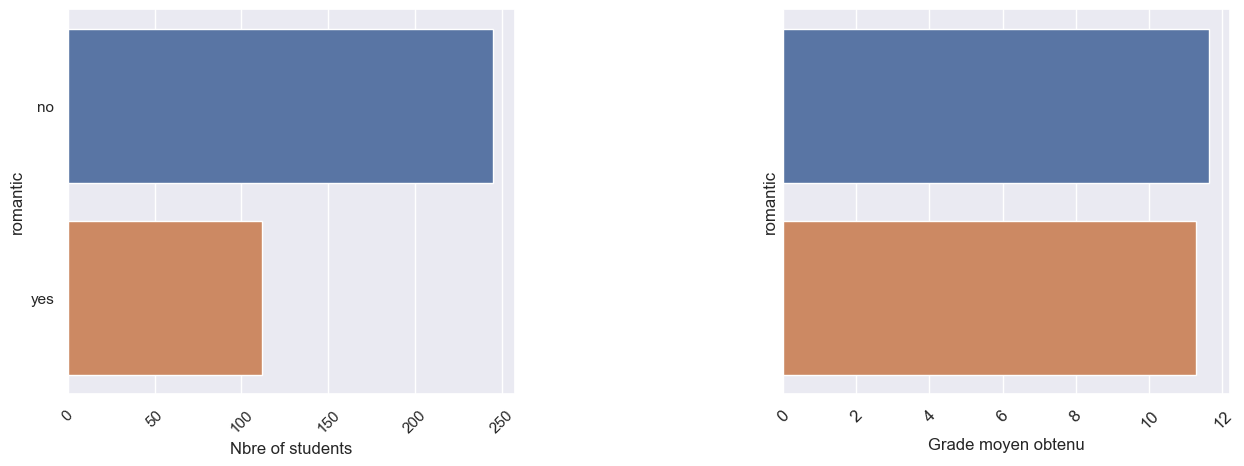

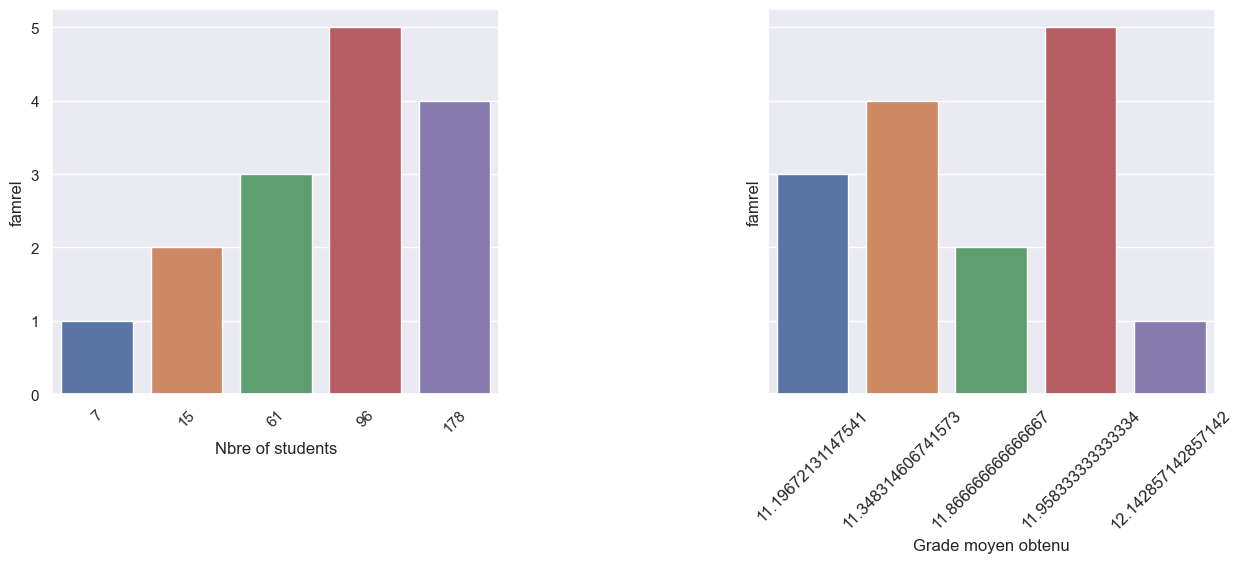

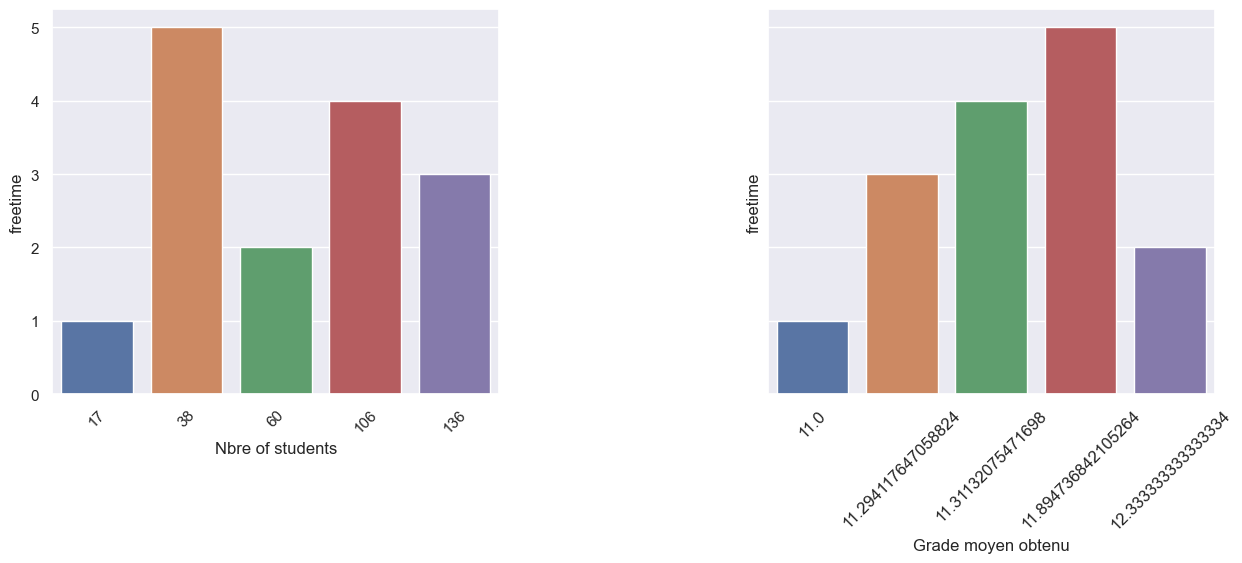

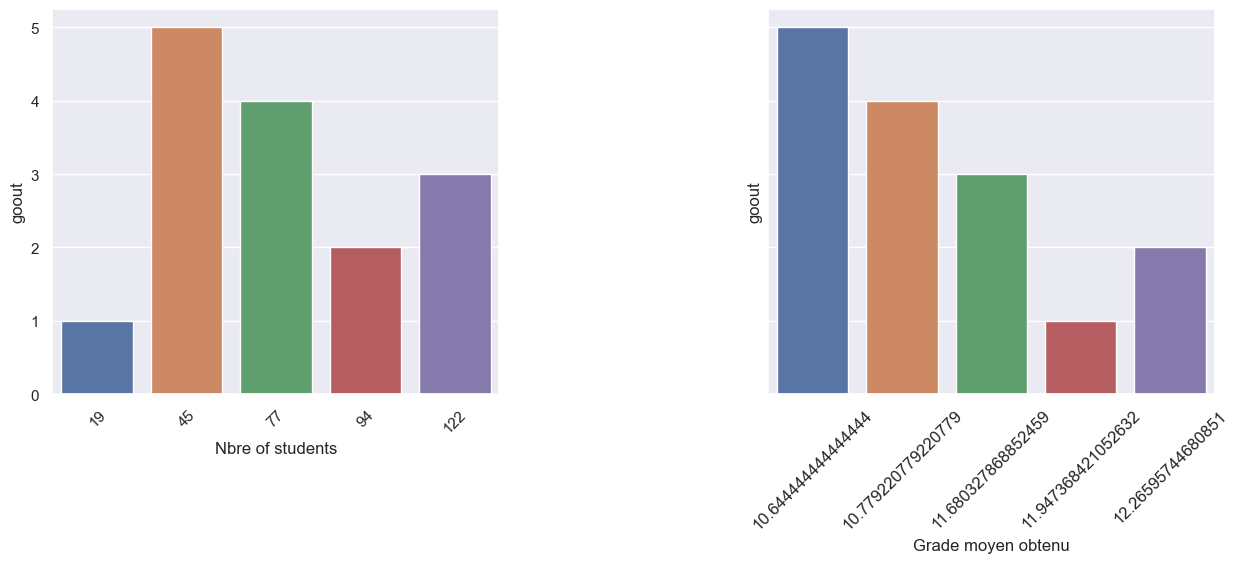

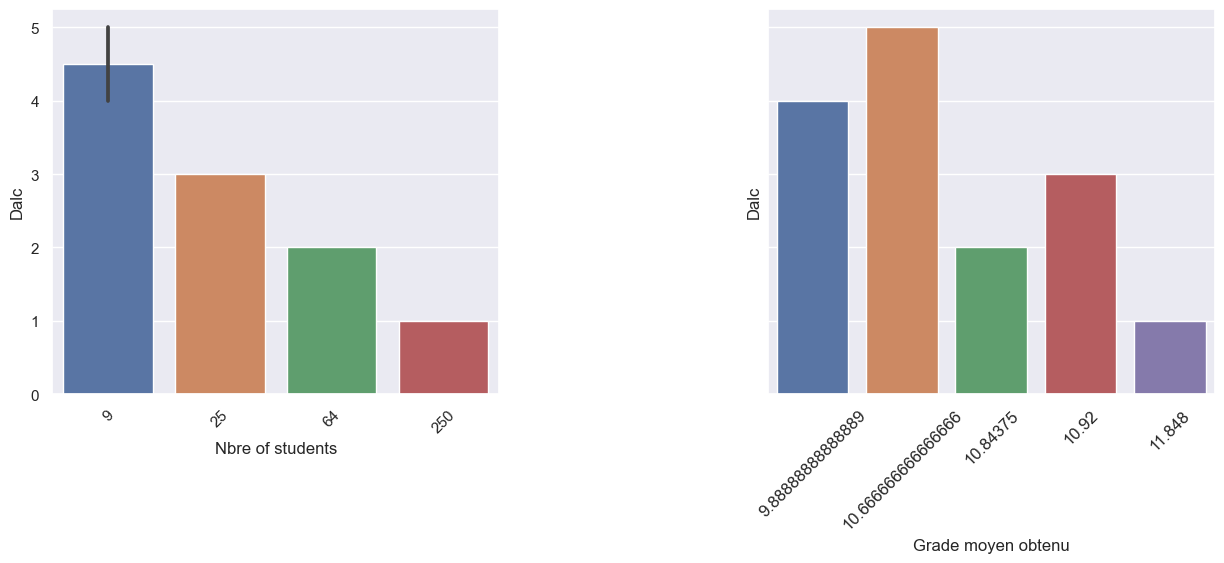

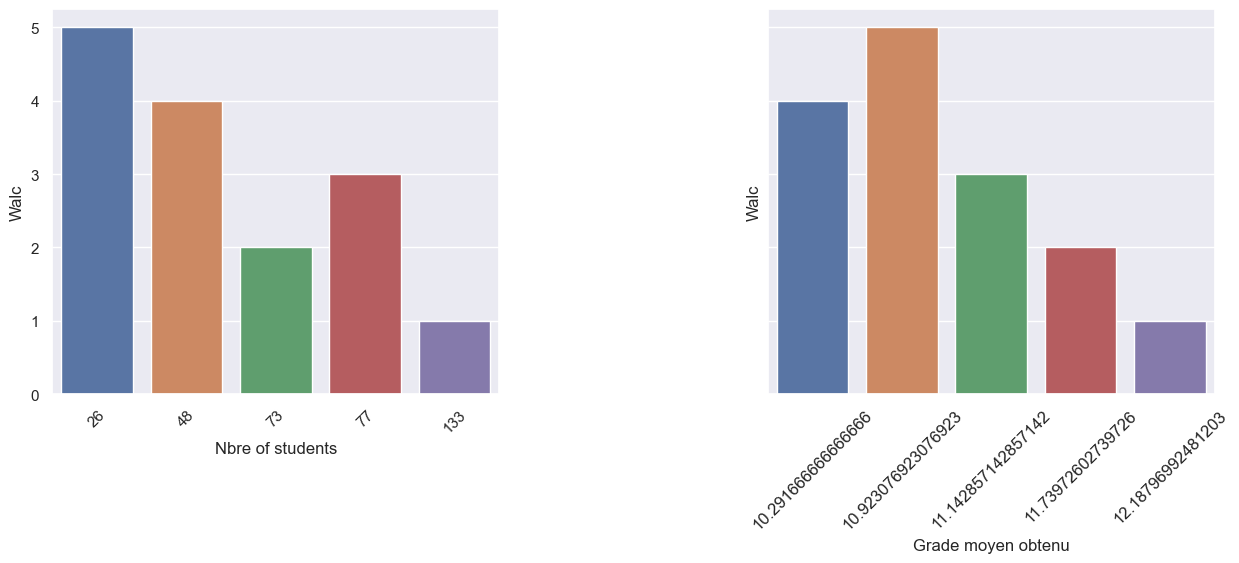

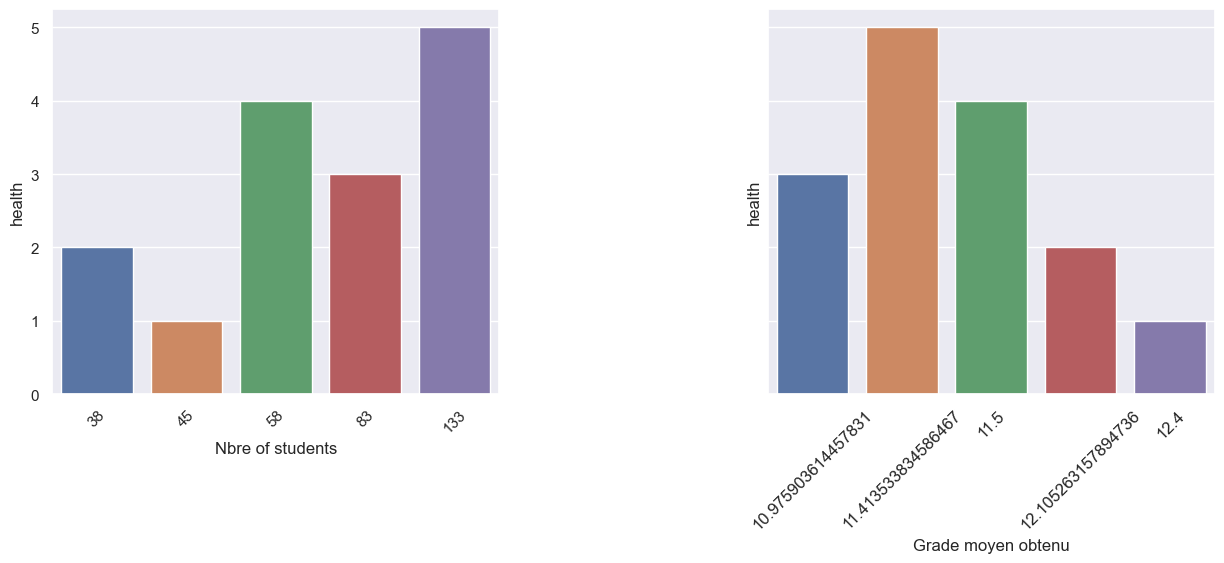

In [29]:
# Concatenate the two lists
features = [i for i in df.columns if df[i].dtype == 'object' ]
#features.extend(var_discret)

# Loop over the features and plot each one
for feature in features:
    if feature not in ['FirstName','FamilyName']:
        plot_categorical_feature( feature,df=df )

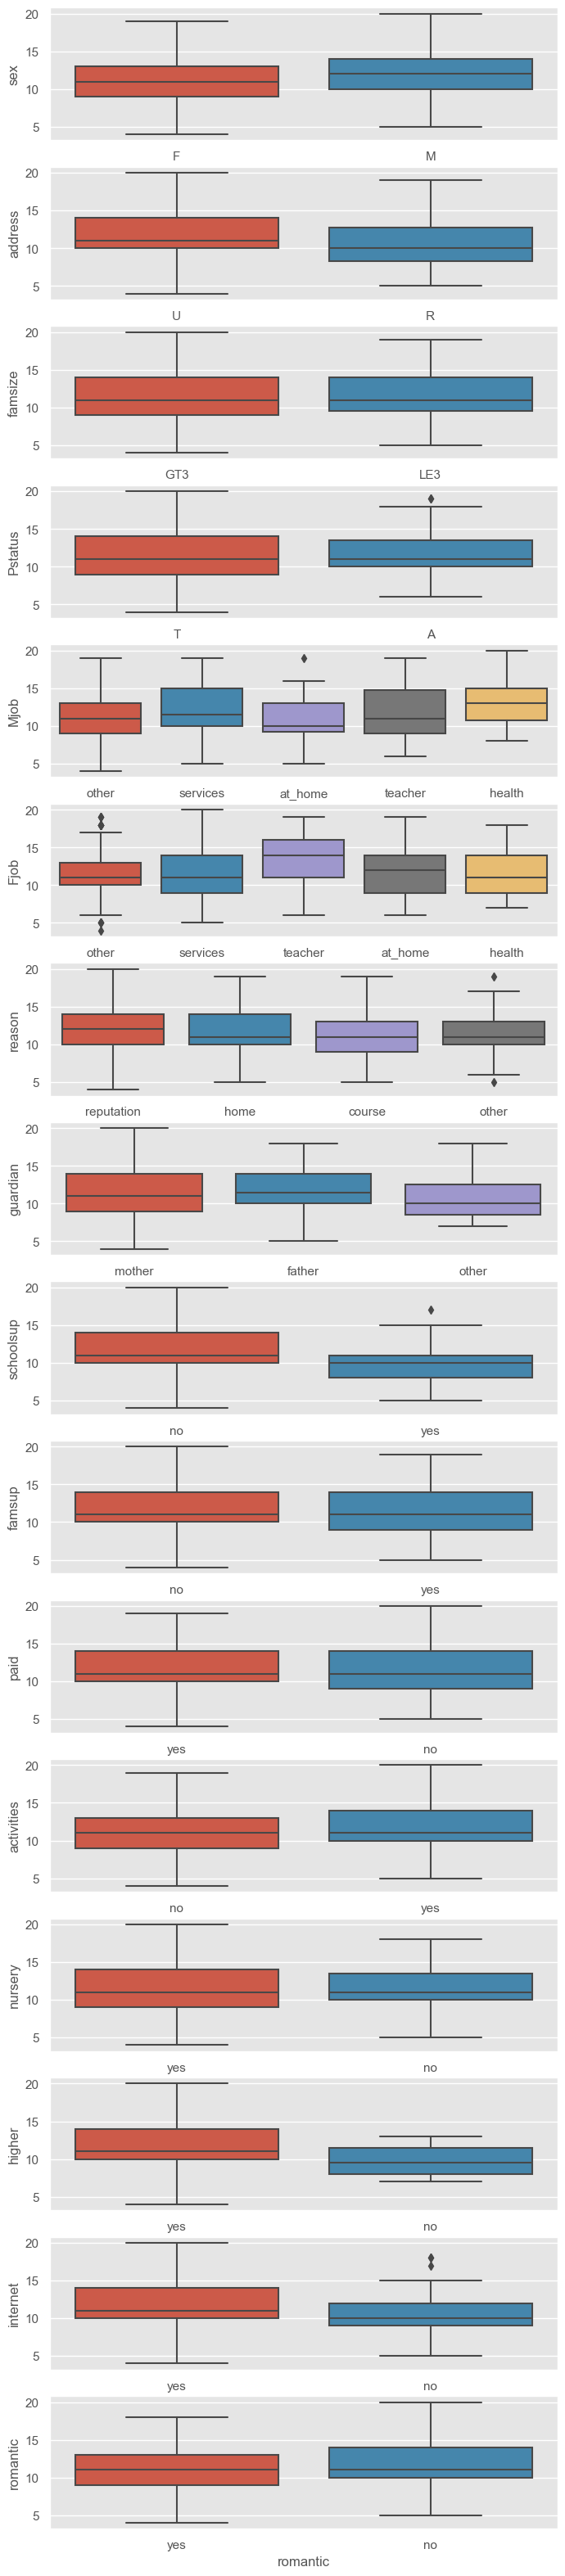

In [30]:
dfplot = df_cleaned.copy(deep=True)
dfplot.drop(columns=['FirstName','FamilyName','FGradebins'], inplace = True)

plt.style.use('ggplot')
fig,axes = plt.subplots(nrows = len(dfplot.select_dtypes(include='O').columns),ncols = 1,figsize=(8,40))

#On calcule Q1 et Q3
q1,q3=dfplot['FinalGrade'].quantile(q=0.25),dfplot['FinalGrade'].quantile(q=0.75)

#On calcule l'écart interquartile (IQR)
IQR=q3-q1

#On calcule la borne inférieure à l'aide du Q1 et de l'écart interquartile
borne_inf = q1-1.5*IQR

#On calcule la borne supérieure à l'aide du Q3 et de l'écart interquartile
borne_sup = q3 +1.5*IQR

for i,col in enumerate( dfplot.drop(columns=['FinalGrade']).select_dtypes(include='O').columns ):
    
    #On garde les valeurs à l'intérieur de la borne inférieure et supérieure
    dfplot.loc[dfplot['FinalGrade']>borne_sup,col] = np.nan
    dfplot.loc[dfplot['FinalGrade']<borne_inf,col] = np.nan
    sns.boxplot(x=col, y='FinalGrade', data = dfplot, ax=axes[i])
    axes[i].set_ylabel(col)

del q1,q3,IQR,borne_inf,borne_sup, dfplot

In [31]:
def plot_num_feature(feature, df = None, orientation_horizontal = True):
    
    sns.set_color_codes("colorblind")
    
    fig,axes =plt.subplots(nrows = 1,ncols= 1 ,figsize=(15,5),sharey=True)
    sns.boxplot(y = feature, x="FinalGrade",data = df, ax = axes, showfliers=False )
    plt.xlabel('Boxplot', fontsize=12)

    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.subplots_adjust(wspace = 0.6)
    plt.show();

### <a name="C36"><font color='teal'>3.6 Multi Colinéarité & liaison</font></a> 

#### <a name="C361"><font color='teal'>3.6.1 Liaison des variables Numeriques et de la Target</font></a> 

In [32]:
# Find correlations with the target and sort
numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns
correlations = df_cleaned[numeric_cols].corr()['FinalGrade'].sort_values(ascending=False)

# Display correlations
print('Most Positive Correlations:\n', correlations[correlations>0])
print('\n\nMost Negative Correlations:\n', correlations[correlations<0])

Most Positive Correlations:
 FinalGrade    1.000000
Medu          0.190308
Fedu          0.158811
studytime     0.126728
famrel        0.037711
Name: FinalGrade, dtype: float64


Most Negative Correlations:
 freetime     -0.021589
health       -0.081691
traveltime   -0.099785
age          -0.140372
Dalc         -0.140690
goout        -0.177383
Walc         -0.190054
absences     -0.213129
failures     -0.293831
Name: FinalGrade, dtype: float64


In [33]:
df.select_dtypes(include = np.number).corr().style.background_gradient()

,age,absences,FinalGrade
age,1.000000,0.215578,-0.140372
absences,0.215578,1.000000,-0.213129
FinalGrade,-0.140372,-0.213129,1.000000


#### <a name="C362"><font color='teal'>3.6.2 Liaison des variables catégorielles et de la Target</font></a> 

In [34]:
# test du khi-2
# H0: Les deux variables sont indépendantes (si p-value > 0.05)
# H1: Les deux variables sont dépendantes   (si p-value < 0.05)

from scipy.stats import chi2_contingency
matriceChi2 = pd.DataFrame(columns=["Stat","pvalue","degree"])

for col in df_cleaned.select_dtypes(include = 'O').columns:
    if col not in ["FinalGrade"]:
        chi2, pvalue, degrees, expected = chi2_contingency(pd.crosstab(df_cleaned.FGradebins, df_cleaned[col]))
        matriceChi2.loc[col,:] = {'Stat': chi2, 'pvalue': pvalue, 'degree': degrees }
        

In [35]:
matriceChi2[['pvalue']].sort_values(by=['pvalue'])

,pvalue
FGradebins,0.0
schoolsup,0.003206
Mjob,0.006916
higher,0.075186
address,0.085898
Fjob,0.112172
paid,0.156785
nursery,0.163292
internet,0.199497
romantic,0.327121


# <a name="C4"><font color='green'>**Partie 4 : Feature Selection**</font></a> 

### <a name="C41"><font color='green'>4.1 Create X & y</font></a> 

In [36]:
X = df_cleaned.dropna().drop(columns = ['FinalGrade','FirstName','FamilyName','FGradebins'])
y = df_cleaned.dropna()['FinalGrade']#.values
X.shape , y.shape

((357, 29), (357,))

In [37]:
# Combien de valeur inf peut-on retrouver dans le dataframe
print('Combien de valeur "inf" dans notre dataframe :',X.apply(lambda x: (x==np.inf).sum() ).sum() )

Combien de valeur "inf" dans notre dataframe : 0


### <a name="C42"><font color='green'>4.2 Train Test Split</font></a> 

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=35)
print("Notre dataset d'entrainement est une matrice {} et la cible {}".format(X_train.shape,y_train.shape))
print("Notre dataset de test est une matrice au format {} et la cible {}".format(X_test.shape,y_test.shape) )

print('\n\n\nEncodage Data categorial')

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

# regrpouper les modalité qui represente moins de 10 batiment dans une super modalité

# Create an instance of One-hot-encoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore',drop='first' ) #

# Transform X_train categorical
df_cat_train = ohe.fit_transform(X_train.select_dtypes(exclude=np.number) ) 
df_cat_train = pd.DataFrame(df_cat_train,
                            columns = ohe.get_feature_names_out(),
                            index = X_train.index)

# Create X_train encoded data 
X_train_encod = pd.merge(X_train.select_dtypes(include=np.number),
                        df_cat_train, left_index=True, right_index=True) 


# Transform X_test categorical
df_cat_test = ohe.transform(X_test.select_dtypes(exclude=np.number) ) 
df_cat_test = pd.DataFrame(df_cat_test,
                           columns = ohe.get_feature_names_out(),
                           index = X_test.index)

# Create X_test encoded data 
X_test_encod = pd.merge(X_test.select_dtypes(include=np.number),
                        df_cat_test, left_index=True, right_index=True) 

print("Notre dataset d'entrainement est une matrice {} et la cible {} dont la moyenne est {:.2f}".format(X_train_encod.shape,y_train.shape, y_train.mean()))
print("Notre dataset de test est une matrice au format {} et la cible {} dont la moyenne est {:.2f}".format(X_test_encod.shape,y_test.shape, y_test.mean()) )

Notre dataset d'entrainement est une matrice (249, 29) et la cible (249,)
Notre dataset de test est une matrice au format (108, 29) et la cible (108,)



Encodage Data categorial
Notre dataset d'entrainement est une matrice (249, 38) et la cible (249,) dont la moyenne est 11.51
Notre dataset de test est une matrice au format (108, 38) et la cible (108,) dont la moyenne est 11.56


### <a name="C43"><font color='green'>4.3 Scaling DataSet</font>

In [39]:
from sklearn.preprocessing import StandardScaler # MinMaxScaler,Normalizer

scaler = StandardScaler().fit(X_train_encod)
X_train_scaled = scaler.transform(X_train_encod)
X_test_scaled = scaler.transform(X_test_encod)

### <a name="C44"><font color='green'>4.4 Feature importance</font>

#### <font color='green'>4.4.1 Feature importance based on mean decrease in impurity</font>

In [40]:
from sklearn.ensemble import RandomForestRegressor

#feature_names = [f"feature {i}" for i in scaler.get_feature_names_out() ]
feature_names = [i for i in scaler.get_feature_names_out() ]
forest = RandomForestRegressor(random_state=0)
forest.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=0)

In [41]:
start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.015 seconds


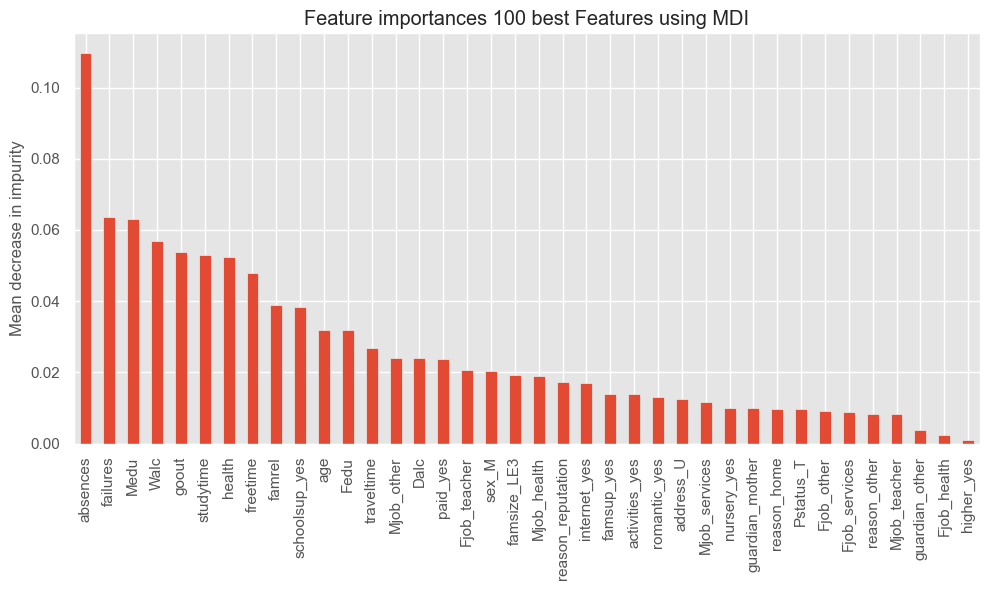

In [42]:
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)[:50]

fig, ax = plt.subplots()
forest_importances.plot.bar( ax=ax)#yerr=std,
ax.set_title("Feature importances 100 best Features using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [43]:
forestBest = RandomForestRegressor(random_state=0)
featureRemaindFiRF_index = [feature_names.index(f) for f in forest_importances[:10].index]
featureRemaindFiRF_names = [f for f in forest_importances[:10].index]
forestBest.fit(X_train_scaled[:,featureRemaindFiRF_index], y_train)

RandomForestRegressor(random_state=0)

In [44]:
#metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error, roc_auc_score

# metric R2
print("R²: ",forest.score(X_test_scaled, y_test).round(4))

# metric rmse
rmse = mean_squared_error(y_test, forest.predict(X_test_scaled)).round(4)
rmseBest = mean_squared_error(y_test, forestBest.predict(X_test_scaled[:,featureRemaindFiRF_index])).round(4)

print("rmse avant: ",rmse,"\nRMSE après réduction de dimension: ", rmseBest)

forestlog = RandomForestRegressor().fit(X_train_scaled, np.log(y_train))
print("log rmse: ",mean_squared_error(np.log(y_test),forestlog.predict(X_test_scaled)).round(4) ) 

R²:  0.2711
rmse avant:  8.1294 
RMSE après réduction de dimension:  8.7505
log rmse:  0.0683


''

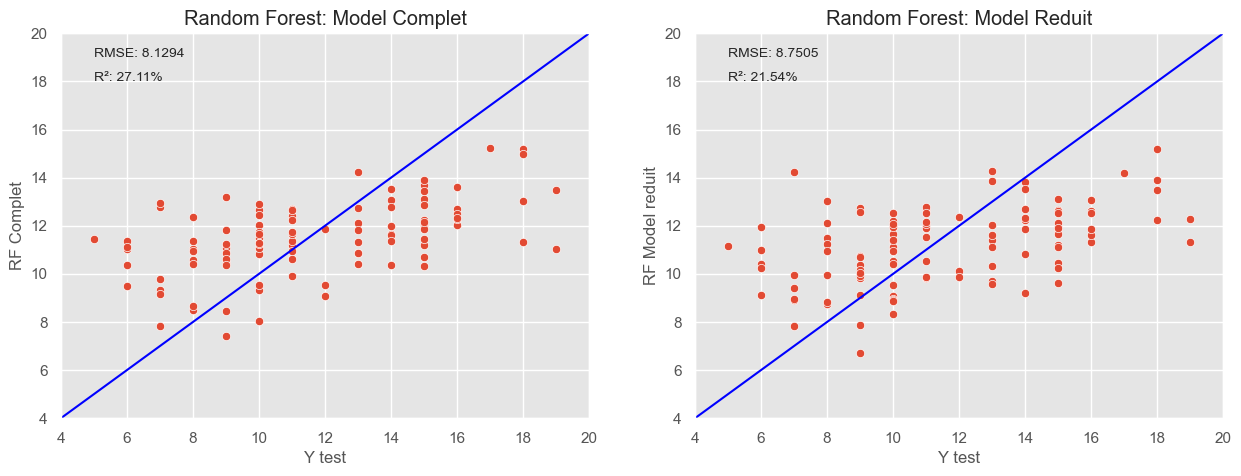

In [45]:
fig,axes =plt.subplots(nrows = 1,ncols= 2 ,figsize=(15,5),sharey=False)
sns.scatterplot(x=y_test, y = forest.predict(X_test_scaled), ax = axes[0])
sns.scatterplot(x=y_test, y = forestBest.predict(X_test_scaled[:,featureRemaindFiRF_index]), ax= axes[1])
sns.lineplot(x = range(21),y = range(21),ax=axes[0], color = 'blue')
sns.lineplot(x = range(21),y = range(21),ax=axes[1], color = 'blue')

axes[0].set_title("Random Forest: Model Complet")
axes[1].set_title("Random Forest: Model Reduit")

# y-axis
axes[0].yaxis.set_label_text('RF Complet')
axes[1].yaxis.set_label_text('RF Model reduit')

axes[0].set_ylim(4,20)
axes[1].set_ylim(4,20)

# x-axis
axes[0].xaxis.set_label_text('Y test')
axes[1].xaxis.set_label_text('Y test')

axes[0].set_xlim(4,20)
axes[1].set_xlim(4,20)

# legend
axes[0].text(5, 19, "RMSE: {}".format(rmse)); axes[0].text(5, 18, "R²: {:.2%}".format(forest.score(X_test_scaled,y_test)))
axes[1].text(5, 19, "RMSE: {}".format(rmseBest))
axes[1].text(5, 18, "R²: {:.2%}".format(forestBest.score(X_test_scaled[:,featureRemaindFiRF_index],y_test)))
;

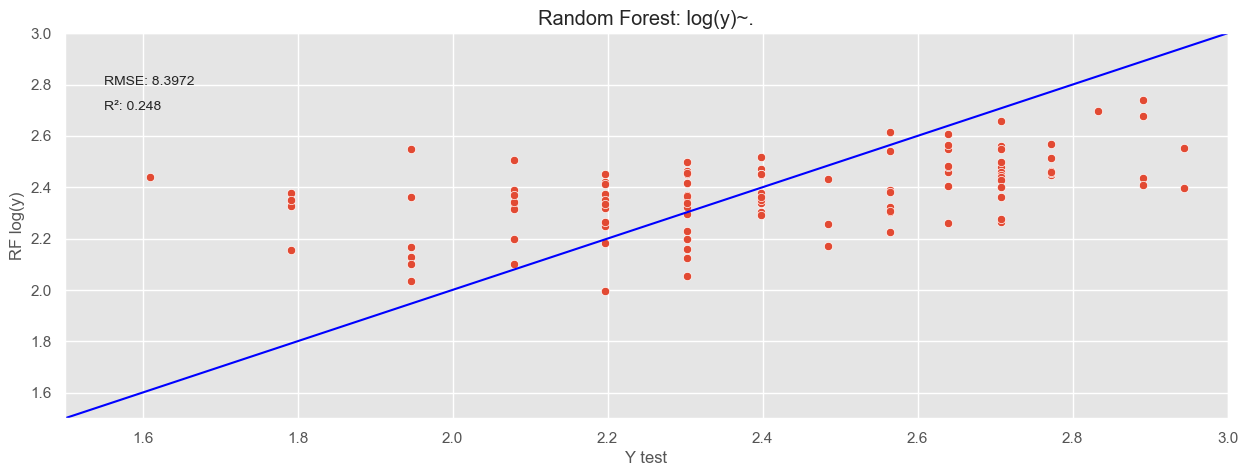

In [46]:
fig,axes =plt.subplots(nrows = 1,ncols= 1 ,figsize=(15,5),sharey=False)
sns.scatterplot(x=np.log(y_test), y = forestlog.predict(X_test_scaled))
sns.lineplot(x = range(21),y = range(21),ax=axes, color = 'blue')
plt.title("Random Forest: log(y)~.")
# y-axis
axes.yaxis.set_label_text('RF log(y)')
axes.set_ylim(1.5,3)

# x-axis
axes.xaxis.set_label_text('Y test')
axes.set_xlim(1.5,3)

# legend
axes.text(1.55, 2.8, "RMSE: {}".format(mean_squared_error(y_test,np.exp(forestlog.predict(X_test_scaled))).round(4)))
axes.text(1.55, 2.7  , "R²: {}".format(forestlog.score(X_test_scaled, np.log(y_test)).round(4)));

#### <font color='green'>4.4.2 Permutation Feature Importance Regression</font>

In [47]:
from sklearn.ensemble import HistGradientBoostingRegressor as HistGBR

histModel = HistGBR().fit(X_train_scaled, y_train)
print( 'R2 :', histModel.score(X_test_scaled, y_test).round(5) )
print('RMSE:',mean_squared_error(y_test, histModel.predict( X_test_scaled ) ).round(5)
)

R2 : 0.25211
RMSE: 8.34142


In [48]:
%%time
from sklearn.inspection import permutation_importance
r = permutation_importance(histModel, X_test_scaled, y_test,
                           n_repeats=30,
                           random_state=0)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 1.96 * r.importances_std[i] > 0:
        print(f"{feature_names[i]:<50}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

schoolsup_yes                                     0.088 +/- 0.026
studytime                                         0.043 +/- 0.020
sex_M                                             0.032 +/- 0.015
Mjob_teacher                                      0.009 +/- 0.004
address_U                                         0.009 +/- 0.003
CPU times: total: 5.92 s
Wall time: 2.07 s


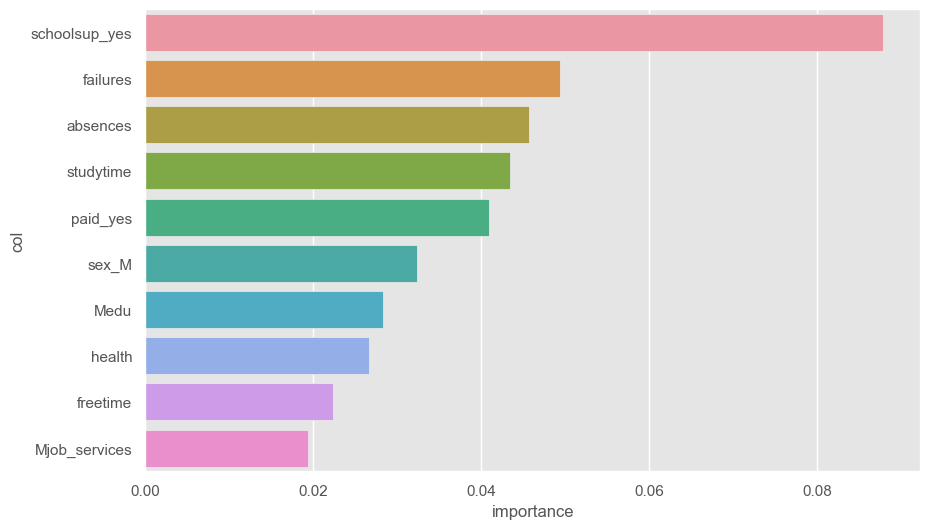

In [49]:
permFeature = pd.DataFrame({'importance':r.importances_mean,'col':scaler.get_feature_names_out() } )
sns.barplot(data = permFeature.sort_values(by='importance',ascending=False).head(10), y='col',x= 'importance');

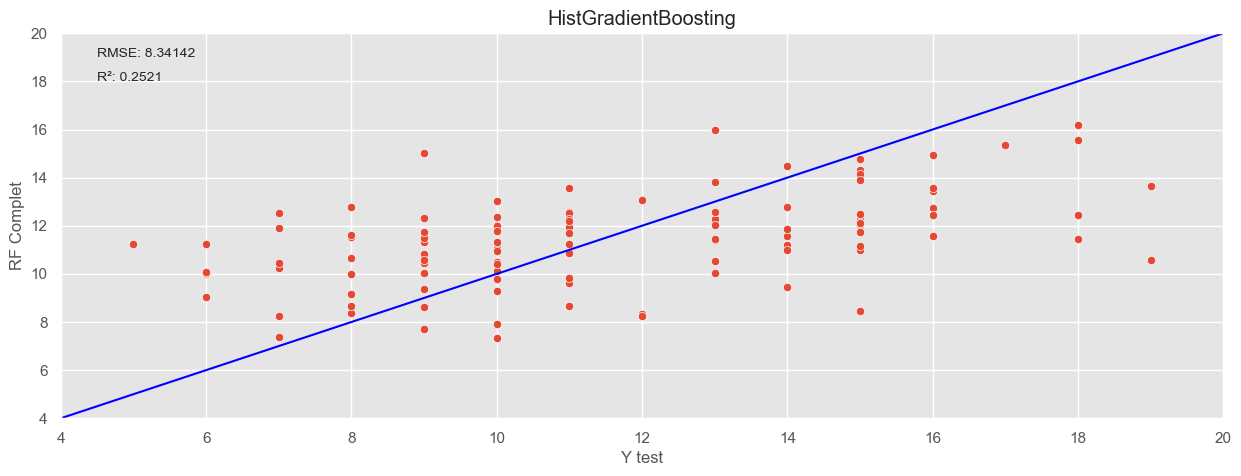

In [50]:
# plot
fig,axes =plt.subplots(nrows = 1,ncols= 1 ,figsize=(15,5),sharey=False)
sns.scatterplot(x=y_test, y = histModel.predict(X_test_scaled), ax = axes)
sns.lineplot(x = range(21),y = range(21),ax=axes, color = 'blue')
plt.title("HistGradientBoosting")
# y-axis
axes.yaxis.set_label_text('RF Complet')
axes.set_ylim(4,20)

# x-axis
axes.xaxis.set_label_text('Y test')
axes.set_xlim(4,20)

# legend
axes.text(4.5, 19, "RMSE: {}".format(mean_squared_error(y_test, histModel.predict( X_test_scaled ) ).round(5)))
axes.text(4.5, 18, "R²: {}".format(histModel.score(X_test_scaled, y_test ).round(4)));

In [51]:
# metric R2
print("R²: ",histModel.score(X_test_scaled, y_test).round(4))

# metric rmse
rmse = mean_squared_error(y_test, histModel.predict(X_test_scaled)).round(4)

print("rmse : ",rmse )

histModellog = HistGBR().fit(X_train_scaled, np.log(y_train))
print("log rmse: ",mean_squared_error(np.log(y_test), histModellog.predict(X_test_scaled)).round(4) ) 
print("log R²: ", histModellog.score(X_test_scaled, np.log(y_test)).round(4))

R²:  0.2521
rmse :  8.3414
log rmse:  0.074
log R²:  0.1854


In [52]:
!python --version

Python 3.9.19


</br>

# <a name="C5"><font color='purple'>**Partie 5 : Reduction de dimension**</font></a> 

In [53]:
# Dataframe pour l'analyse de données
XAF = df_cleaned.drop(columns=['FirstName', 'FamilyName'] )

# Create an instance of One-hot-encoder
oheRD = OneHotEncoder(sparse_output=False, handle_unknown='ignore',drop='first' ) #

# Transform X_train categorical
df_catRD = oheRD.fit_transform(XAF.select_dtypes(exclude=np.number) ) 
df_catRD = pd.DataFrame(df_catRD,
                        columns = oheRD.get_feature_names_out(),
                        index = XAF.index)

# Create X_train encoded data 
X_RD_encod = pd.merge(XAF.select_dtypes(include=np.number),
                      df_catRD, left_index=True, right_index=True
                     ) 

# Scaler de data
scaler = StandardScaler().fit(X_RD_encod)
X_RD_encod_sc = scaler.transform(X_RD_encod)

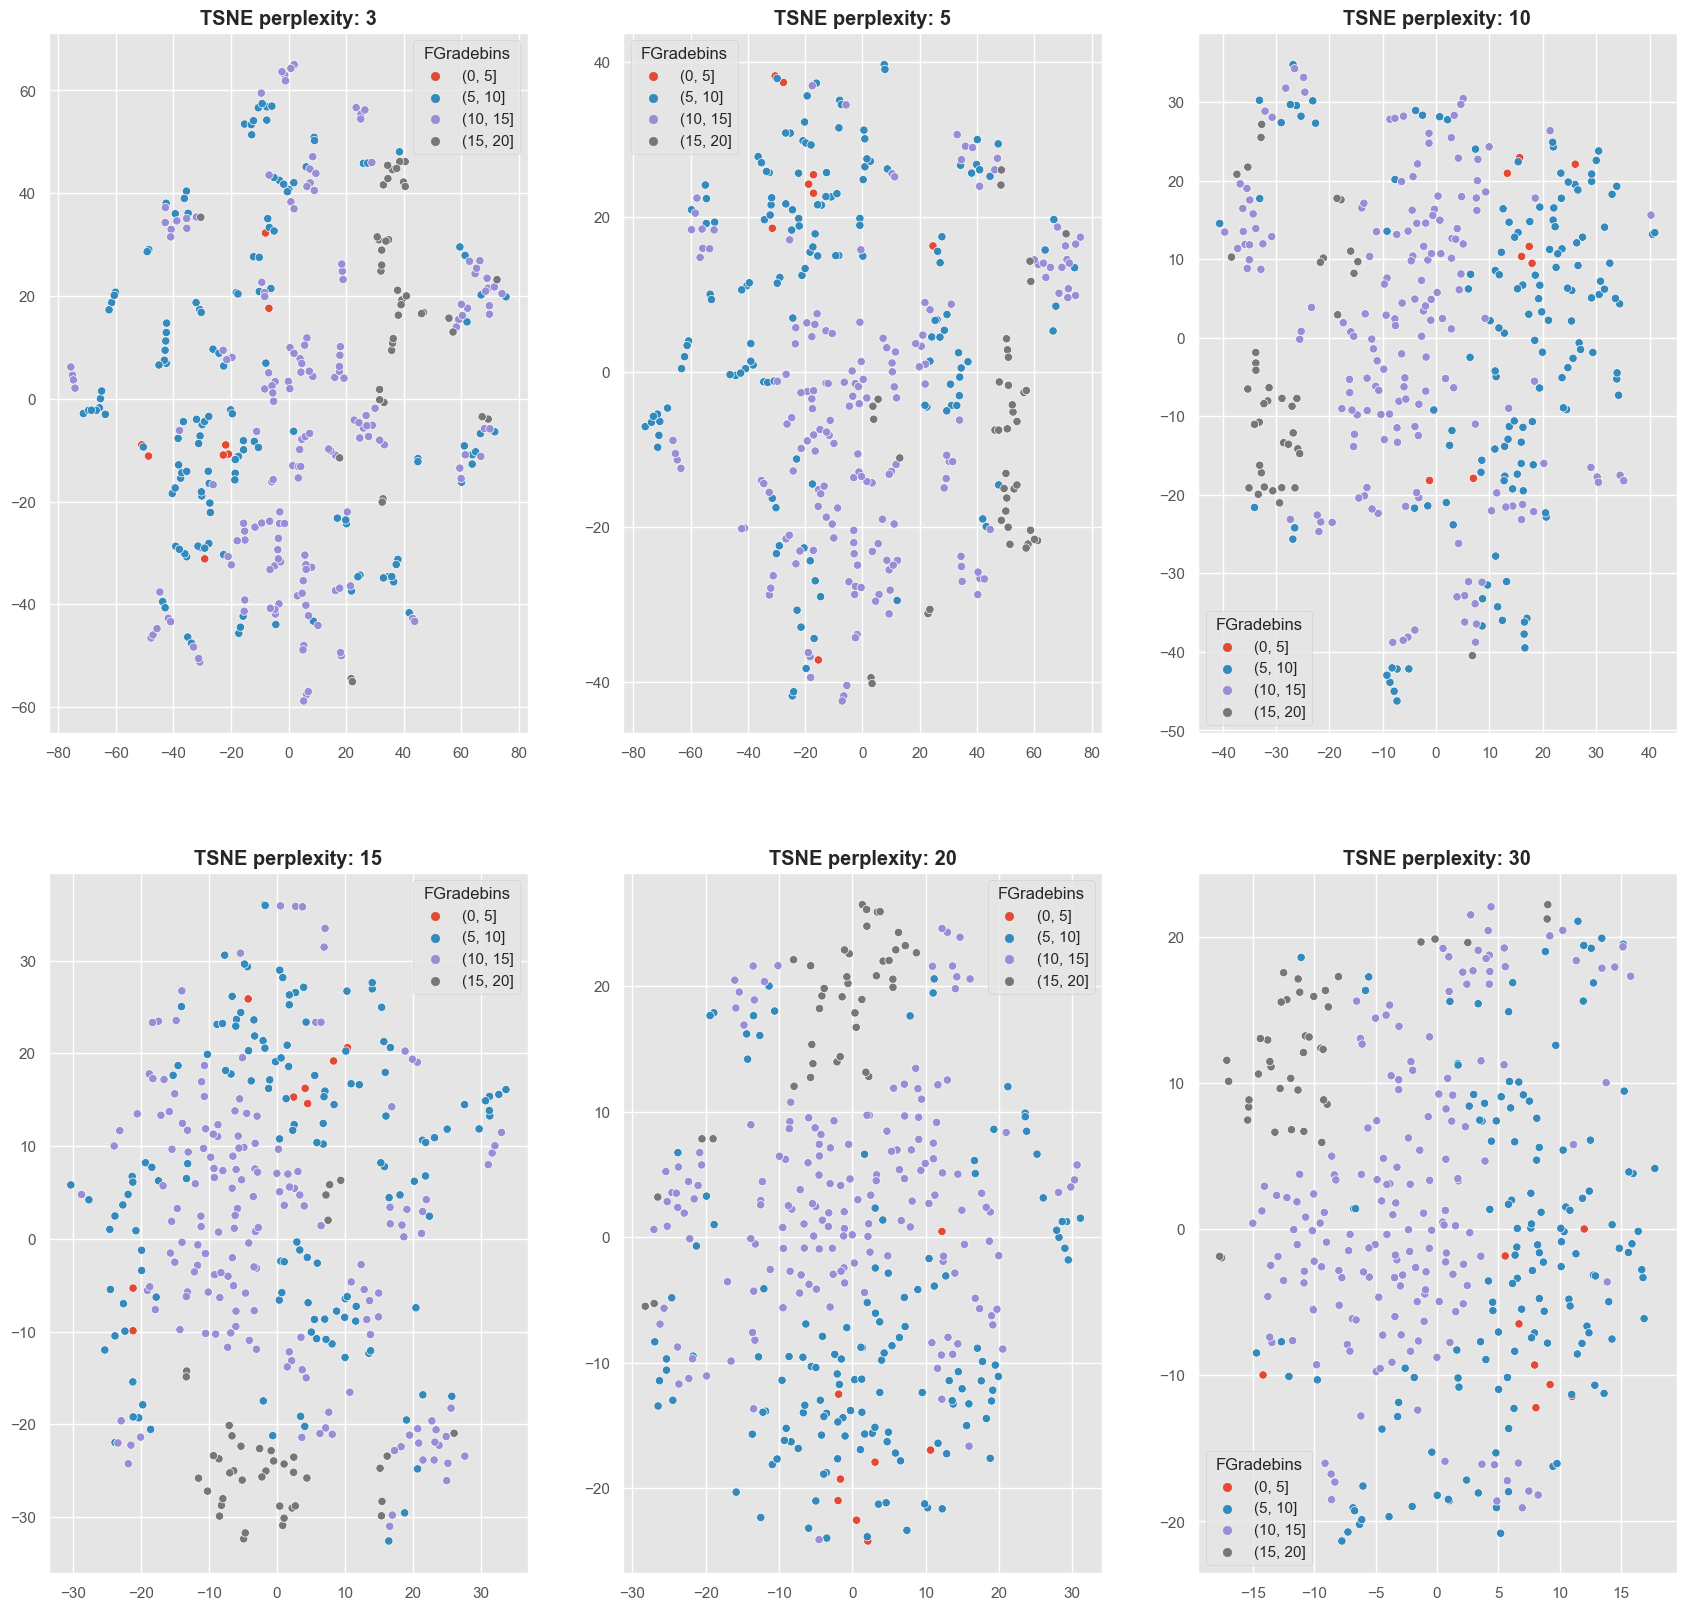

In [54]:
from sklearn.manifold import TSNE
import warnings

listPerplexity = [3,5,10,15,20,30]
warnings.filterwarnings("ignore")
fig,axes = plt.subplots(nrows = 2,ncols = 3,figsize=(21,20))

for i,p in enumerate(listPerplexity):
    X_embedded = TSNE(n_components=2, learning_rate='auto',init='pca', perplexity=p)\
    .fit_transform( X_RD_encod_sc )

    
    sns.scatterplot(x = X_embedded[:,0],y = X_embedded[:,1],hue=df_cleaned.FGradebins, ax = axes.flatten()[i] )

    axes.flatten()[i].set_title('TSNE perplexity: {}'.format(p), fontweight ="bold")
    ;

### ACP

In [55]:
from sklearn.decomposition import PCA

# Principal Component Analysis
pca = PCA()
X_pca = pca.fit(np.concatenate((X_train_encod, X_test_encod), axis=0))\
.transform(np.concatenate((X_train_encod, X_test_encod), axis=0))

#### Selection du nombre d'axe d'ACP à conserver

- Regle de Kaiser en ACP normé: Conserver axes ssi λ > 1

In [56]:
print("Nombre d'axes conservés avec cette méthode: ",np.sum(pca.explained_variance_>1) )

Nombre d'axes conservés avec cette méthode:  6


- ébouli des valeurs propes

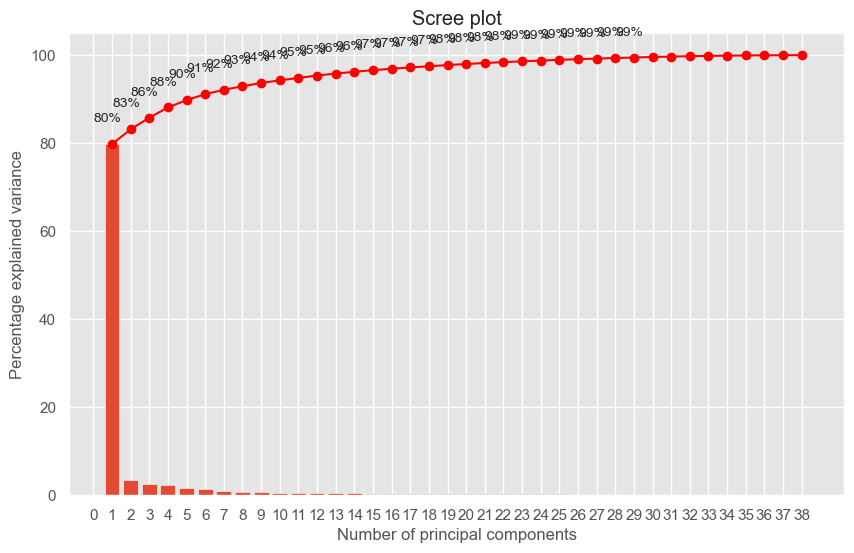

In [57]:
scree = pca.explained_variance_ratio_*100
plt.bar(np.arange(len(scree))+1, scree)
plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')

for i in np.arange(len(scree)-9):
    plt.text(i, scree.cumsum()[i]+5,s =str(round(scree.cumsum()[i]))+'%')   
plt.xlabel("Number of principal components")
plt.ylabel("Percentage explained variance")
plt.title("Scree plot")
plt.xticks(np.arange(len(scree)+1))
plt.show(block=False)

Nous conservons 2 components sur 38 colonnes au départ

- Règle conserver axes ssi:
 $λ< (100/p)$ </br>
 Cette valeur représente la variabilité d'une variable brute apres centrage reduction.

In [58]:
print("Nombre d'axes conservés avec cette méthode: {}.\nCe qui représente {:.2%} des colonnes du début".format(np.sum(pca.explained_variance_*100<(100/np.concatenate((X_train_encod, X_test_encod), axis=0).shape[1])),
                                                                                                               np.sum(pca.explained_variance_*100<(100/np.concatenate((X_train_encod, X_test_encod), axis=0).shape[1]))/np.concatenate((X_train_encod, X_test_encod), axis=0).shape[1]) 
     )

Nombre d'axes conservés avec cette méthode: 2.
Ce qui représente 5.26% des colonnes du début


''

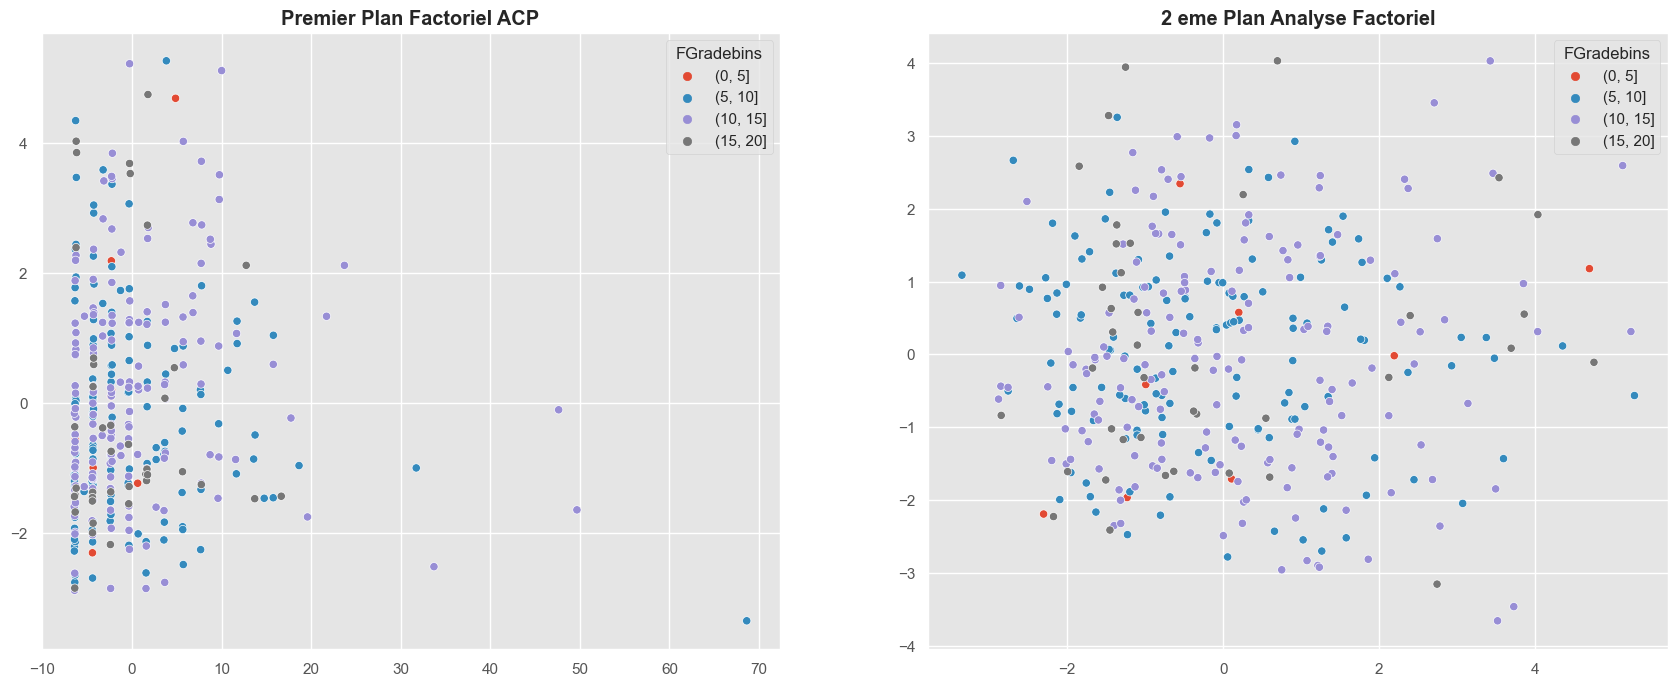

In [59]:
import warnings
warnings.filterwarnings("ignore")
fig,axes = plt.subplots(nrows = 1,ncols = 2,figsize=(21,8))
sns.scatterplot(x = X_pca[:,0],y = X_pca[:,1],hue=df_cleaned.FGradebins,ax = axes[0])
sns.scatterplot(x = X_pca[:,1],y = X_pca[:,2],hue=df_cleaned.FGradebins,ax = axes[1])

axes[0].set_title('Premier Plan Factoriel ACP', fontweight ="bold")
axes[1].set_title('2 eme Plan Analyse Factoriel', fontweight ="bold")
;

In [60]:
del df_cat_test, df_cat_train, df_catRD
gc.collect()

18462

# <a name="C6"><font color='red'>**Partie 6 : Création de Score**</font></a> 

In [61]:
df_cleaned.columns

Index(['FirstName', 'FamilyName', 'sex', 'age', 'address', 'famsize',
       'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'FinalGrade',
       'FGradebins'],
      dtype='object')

In [161]:
for cx in ["paid","internet","goout","Dalc","Walc","studytime","schoolsup","health","famrel"]:
    print( df[[cx,"FinalGrade"]].groupby(by=cx).agg([np.median, np.mean, np.std, len]))

     FinalGrade                          
         median       mean       std  len
paid                                     
no         11.0  11.614130  3.401706  184
yes        11.0  11.427746  3.038844  173
         FinalGrade                          
             median       mean       std  len
internet                                     
no             10.0  10.706897  2.967713   58
yes            11.0  11.682274  3.256803  299
      FinalGrade                          
          median       mean       std  len
goout                                     
1           11.0  11.947368  2.933971   19
2           12.0  12.265957  3.045093   94
3           11.0  11.680328  3.230194  122
4           10.0  10.779221  3.089129   77
5           10.0  10.644444  3.593906   45
     FinalGrade                          
         median       mean       std  len
Dalc                                     
1          11.0  11.848000  3.297939  250
2          10.5  10.843750  3.112794   64
3     

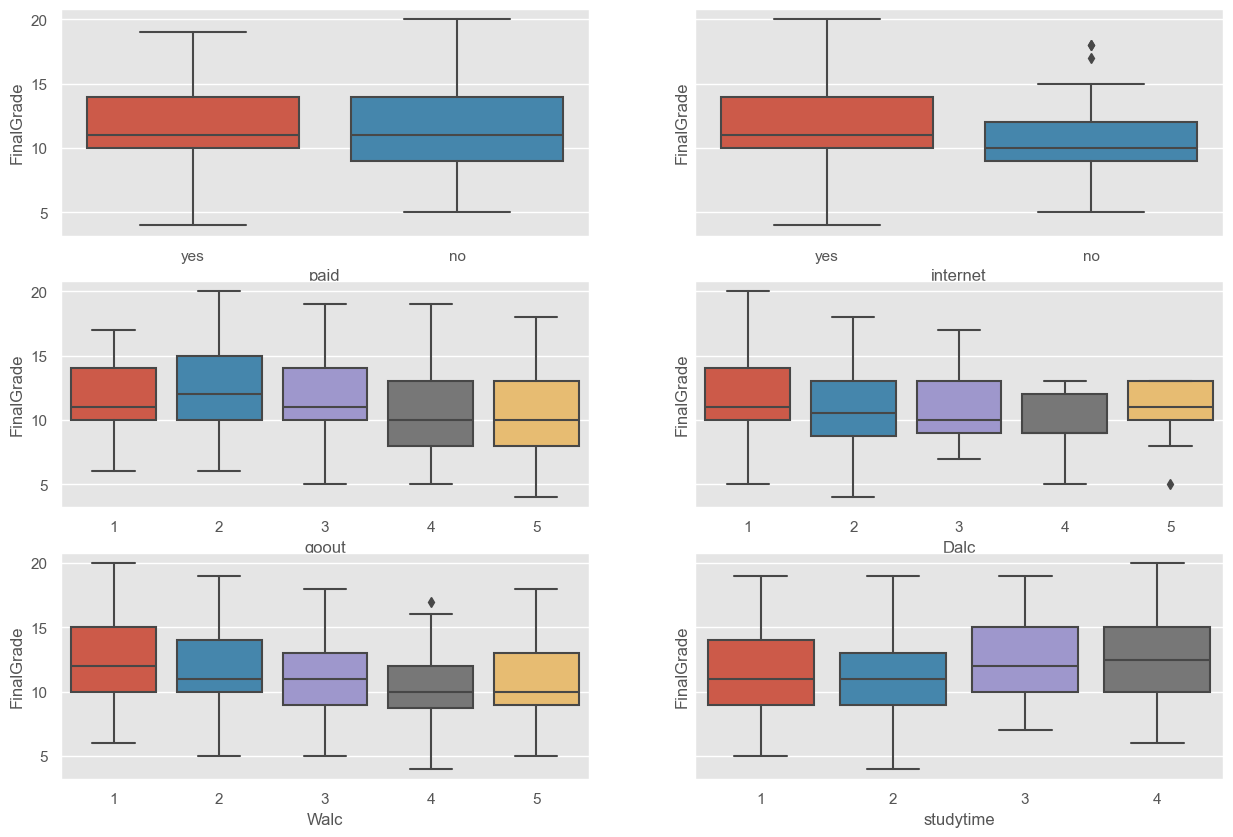

In [63]:
fig,axes =plt.subplots(nrows = 3,ncols= 2 ,figsize=(15,10),sharey=True)
for i,c in enumerate(["paid","internet","goout","Dalc","Walc","studytime"]):
        sns.boxplot(x=c,  y='FinalGrade',  data=df, ax= axes.flatten()[i] );

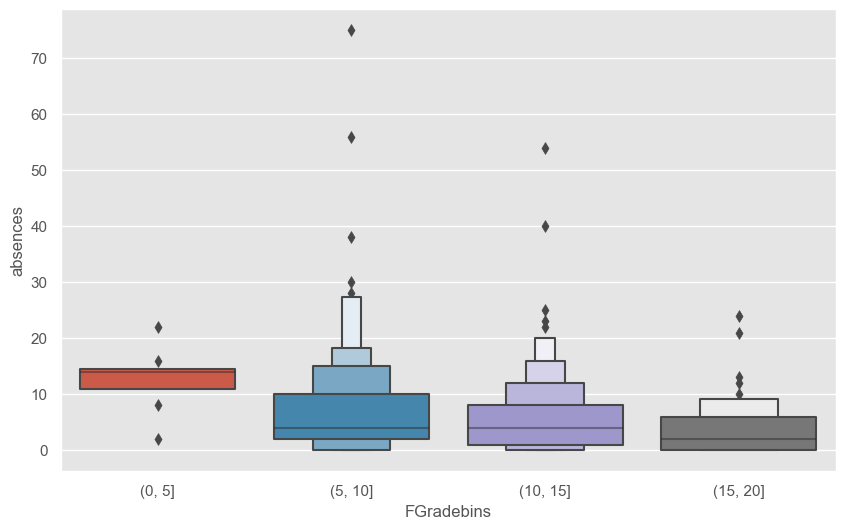

In [64]:
sns.boxenplot(x='FGradebins', y='absences', data=df_cleaned);

In [162]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Spécification du modèle ANOVA
model = ols('FinalGrade ~ studytime + goout + Dalc + Walc + schoolsup + internet + absences', data=df.sort_index()).fit()
# Traitement:Facteur1 + Traitement:Facteur2 + Facteur1:Facteur2

# Réalisation de l'ANOVA
anova_table = sm.stats.anova_lm(model) #, typ=2 
# Ce type de somme de carrés attribue la variation aux termes principaux du modèle ainsi qu'aux interactions entre les termes. 
# Il est souvent utilisé lorsque les interactions sont d'intérêt et que le modèle inclut des interactions.

# Affichage de la table ANOVA
print(anova_table)

              df       sum_sq     mean_sq          F    PR(>F)
studytime    3.0   133.060948   44.353649   4.895816  0.002406
goout        4.0   105.094457   26.273614   2.900117  0.022028
Dalc         4.0    40.817618   10.204405   1.126376  0.343837
schoolsup    1.0   209.287026  209.287026  23.101384  0.000002
romantic     1.0    14.033556   14.033556   1.549043  0.214129
absences     1.0   108.404423  108.404423  11.965826  0.000610
Residual   342.0  3098.349592    9.059502        NaN       NaN


In [163]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             FinalGrade   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     4.815
Date:                Sun, 24 Mar 2024   Prob (F-statistic):           4.11e-08
Time:                        13:42:06   Log-Likelihood:                -892.28
No. Observations:                 357   AIC:                             1815.
Df Residuals:                     342   BIC:                             1873.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           13.3711      0.752     17.776      0.000      11.892      14.851
studytime[T.2]      -0.2867      0.405     -0.708      0.479      -1.083       0.510
studytime[T.3]       0.7613      0.530      1.438      0.151      -0.280       1.803
studytime[T.4]       0.9830      0.705      1.394      0.164      -0.404       2.370
goout[T.2]          -0.3073      0.772     -0.398      0.691      -1.825       1.211
goout[T.3]          -0.9505      0.760     -1.251      0.212      -2.445       0.544
goout[T.4]          -1.2720      0.788     -1.614      0.107      -2.822       0.278
goout[T.5]          -1.5149      0.853     -1.776      0.077      -3.193       0.163
Dalc[T.2]           -0.6758      0.431     -1.568      0.118      -1.524       0.172
Dalc[T.3]           -0.7002      0.665     -1.053      0.293      -2.008       0.607
Dalc[T.4]           -1.1676      1.038     -1.124      0.262      -3.210       0.875
Dalc[T.5]           -0.2523      1.077     -0.234      0.815      -2.371       1.866
schoolsup[T.yes]    -2.2697      0.467     -4.862      0.000      -3.188      -1.352
romantic[T.yes]     -0.1815      0.361     -0.503      0.616      -0.892       0.529
absences            -0.0698      0.020     -3.459      0.001      -0.110      -0.030
==============================================================================
Omnibus:                        3.579   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.167   Jarque-Bera (JB):                3.456
Skew:                           0.192   Prob(JB):                        0.178
Kurtosis:                       2.709   Cond. No.                         105.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Train Test pour ANOVA

In [164]:
trainIndex = df.sample(frac = 0.8,replace=False).index
testIndex = [x for x in df.index if x not in trainIndex]
#len(np.unique(testIndex))/df.shape[0]

dfaovtrain = df.loc[trainIndex]
dfaovtest = df.loc[testIndex]

print("Train : ",dfaovtrain.shape, "Test : ",dfaovtest.shape)

Train :  (286, 33) Test :  (71, 33)


In [433]:
# Spécification du modèle ANOVA
modelaov = ols('np.log(FinalGrade) ~ studytime + goout + Walc +absences + health', data=dfaovtrain.sort_index()).fit()

# Réalisation de l'ANOVA
anova_table = sm.stats.anova_lm(modelaov) #, typ=2 

# Affichage de la table ANOVA
print(anova_table)

              df     sum_sq   mean_sq          F    PR(>F)
studytime    3.0   0.688719  0.229573   2.871463  0.036816
goout        4.0   0.843199  0.210800   2.636649  0.034442
Walc         4.0   0.264338  0.066084   0.826573  0.509198
health       4.0   0.400773  0.100193   1.253202  0.288833
absences     1.0   0.919083  0.919083  11.495738  0.000802
Residual   269.0  21.506515  0.079950        NaN       NaN


In [439]:
from sklearn.metrics import r2_score
print("rmse : {:.5f}".format(mean_squared_error(dfaovtest.FinalGrade, np.exp(modelaov.predict(dfaovtest))) ),
      "\nR² : {:.3%}".format( r2_score(dfaovtest.FinalGrade, np.exp(modelaov.predict(dfaovtest))) )
     )

rmse : 9.46543 
R² : 14.678%


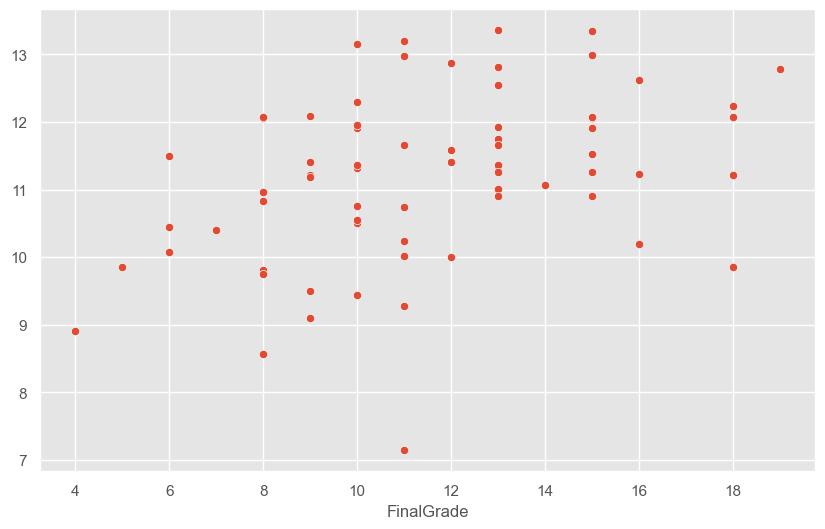

In [437]:
sns.scatterplot(x = dfaovtest.FinalGrade, y = np.exp(modelaov.predict(dfaovtest)));

In [443]:
modelaovRd = ols('FinalGrade ~ studytime + goout + schoolsup + internet + absences', data=df).fit()

print("rmse : {:.5f}".format( mean_squared_error(dfaovtest.FinalGrade, modelaovRd.predict(dfaovtest)) ),
      "\nR² : {:.3%}".format( r2_score( dfaovtest.FinalGrade, modelaovRd.predict(dfaovtest)) )
     )

rmse : 9.81330 
R² : 11.543%


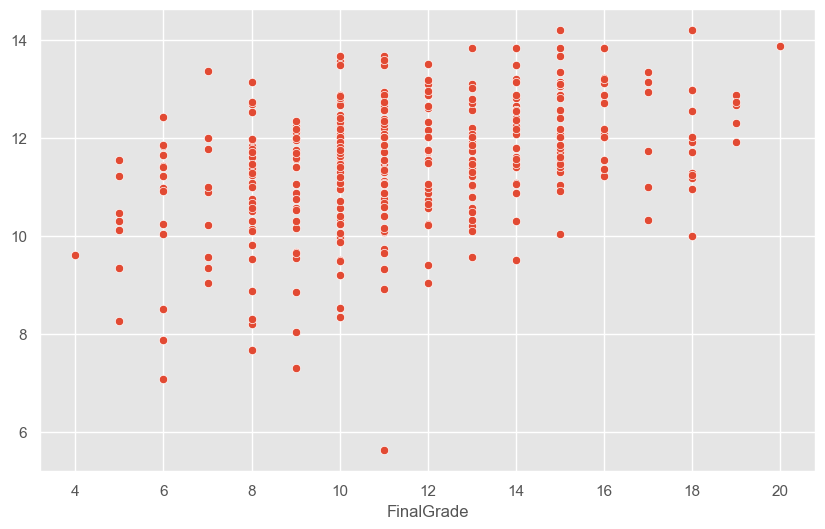

In [444]:
sns.scatterplot(x = df.FinalGrade, 
                y = modelaovRd.predict(df[["studytime","goout","schoolsup","internet" , "absences"]] ));

In [75]:
df["score"] = modelaovRd.predict(df[["FinalGrade","studytime","goout","schoolsup","internet" , "absences"]] )

#### Pipeline

In [76]:
Xx = df.dropna().drop(columns = ['FinalGrade','FirstName','FamilyName'])
yy = df.dropna()['FinalGrade']#.values
Xx_train, Xx_test, yy_train, yy_test = train_test_split(Xx, yy, test_size=0.3, random_state=35)

In [77]:
from sklearn.compose import ColumnTransformer , make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from copy import deepcopy

def intermediaire_pipe_pretraitement(X_train,model):
    """
    Fonction qui crée un pipeline, en prétraitant les données en amont puis
    en appliquant un model à la fin

    Args:
        X_train (pandas.core.frame.DataFrame): Training Dataset.
        model (type): model de type sklearn. C'est à dire possedant la méthode fit

    Returns:
        type: Description de la valeur de retour.

    Raises:
        ErrorType: Description de l'erreur éventuellement levée.

    Examples:
        Exemples d'utilisation de la fonction.
    """    
    #Numerical featues
    numeric_features = make_column_selector(dtype_include=np.number)
    numeric_transformer = Pipeline(
        steps=[('impNumerical', SimpleImputer(strategy="mean")) ]
    )

    # categorials features
    categorical_features = make_column_selector(dtype_include="object")
    categorical_transformer = Pipeline(
        steps=[
            ('impCat', SimpleImputer(strategy = 'most_frequent')),
            ('ohe', OneHotEncoder(drop = 'first', handle_unknown = 'ignore',sparse=False)),
        ])
    
    # columntransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ("num",  numeric_transformer, numeric_features),
            ("cat",  categorical_transformer, categorical_features),
        ])

    # pipeline
    intermediaire_pipeline = Pipeline(
        steps=[
            ("preprocessor", preprocessor),
            ("model",model)]
    )
    
    return intermediaire_pipeline

In [78]:
# Entraîner le pipeline sur les données d'entraînement
intermediaire_pipeline = intermediaire_pipe_pretraitement( X_train,StandardScaler() )
    
# Application pipeline    
X_train_pt = pd.DataFrame(intermediaire_pipeline.fit_transform(X_train),
                          columns=intermediaire_pipeline.get_feature_names_out()
                         )

In [79]:
["studytime","goout","Dalc","Walc","schoolsup","internet","absences"]

['studytime', 'goout', 'Dalc', 'Walc', 'schoolsup', 'internet', 'absences']

### <a name="C62"><font color='red'>6.2 Random Forest</font></a>

In [186]:
# Use the copy module of Python for deep copy operations
RF_pipe = deepcopy(intermediaire_pipeline)
RF_pipe.steps.append(['reg',RandomForestRegressor(n_jobs=-1)])
yrftest = RF_pipe.fit(Xx_train[["paid","studytime","goout","Dalc","Walc","schoolsup","internet","absences"]], yy_train)\
.predict(Xx_test[["paid","studytime","goout","Dalc","Walc","schoolsup","internet","absences"]])

In [181]:
print("rmse : {:.5f}".format( mean_squared_error(y_test, yrftest) ),
      "\nR² : {:.3%}".format( r2_score( y_test, yrftest) )
     )

rmse : 11.22246 
R² : -0.621%


In [187]:
# Use the copy module of Python for deep copy operations
RF_pipe = deepcopy(intermediaire_pipeline)
RF_pipe.steps.append(['reg',RandomForestRegressor(n_jobs=-1)])
yrftest = RF_pipe.fit(X_train[["paid","studytime","goout","Dalc","Walc","schoolsup","internet","absences"]], y_train)\
.predict(X_test[["paid","studytime","goout","Dalc","Walc","schoolsup","internet","absences"]])

print("rmse : {:.5f}".format( mean_squared_error(y_test, yrftest) ),
      "\nR² : {:.3%}".format( r2_score( y_test, yrftest) )
     )

rmse : 8.58702 
R² : 23.008%


### <a name="C63"><font color='red'>6.3 HistGradient BoostingRegressor</font></a>

In [184]:
%%time
# Use the copy module of Python for deep copy operations
HistGB_pipe = deepcopy(intermediaire_pipeline)
HistGB_pipe.steps.append(['reg',HistGBR()])
yhistGBtest = HistGB_pipe.fit(X_train[["paid","studytime","goout","Dalc","Walc","schoolsup","internet","absences"]], y_train)\
.predict(X_test[["paid","studytime","goout","Dalc","Walc","schoolsup","internet","absences"]])

print("rmse : {:.5f}".format( mean_squared_error(y_test, yhistGBtest) ),
      "\nR² : {:.3%}".format( r2_score( y_test, yhistGBtest) )
     )

rmse : 8.65895 
R² : 22.364%
CPU times: total: 109 ms
Wall time: 212 ms


### <a name="C64"><font color='red'>6.4 Regression Lineaire</font></a>

In [84]:
%%time
from sklearn.linear_model import LinearRegression
# Use the copy module of Python for deep copy operations
rl_pipe = deepcopy(intermediaire_pipeline)
rl_pipe.steps.append(['reg',LinearRegression()])
yrltest = rl_pipe.fit(X_train[["paid","studytime","goout","Dalc","Walc","schoolsup","internet","absences"]], y_train)\
.predict(X_test[["paid","studytime","goout","Dalc","Walc","schoolsup","internet","absences"]])

print("rmse : {:.5f}".format( mean_squared_error(y_test, yrltest) ),
      "\nR² : {:.3%}".format( r2_score( y_test, yrltest) )
     )

rmse : 9.40210 
R² : 15.700%
CPU times: total: 15.6 ms
Wall time: 24 ms


In [256]:
rl_pipe[-1].coef_

array([ 0.41472319, -0.51727452,  0.13093197, -0.43151392, -0.61528781,
       -0.2576304 , -0.70965853,  0.46336069])

### <a name="C65"><font color='red'>6.5 Sauvegarde du meilleur model</font></a>

In [85]:
import joblib
joblib.dump(RF_pipe,"data/RandomForestRegressor_model.sav")
joblib.dump(rl_pipe,"data/LinearRegression_model.sav")

['data/LinearRegression_model.sav']

</br>

</br>

<Axes: xlabel='absences'>

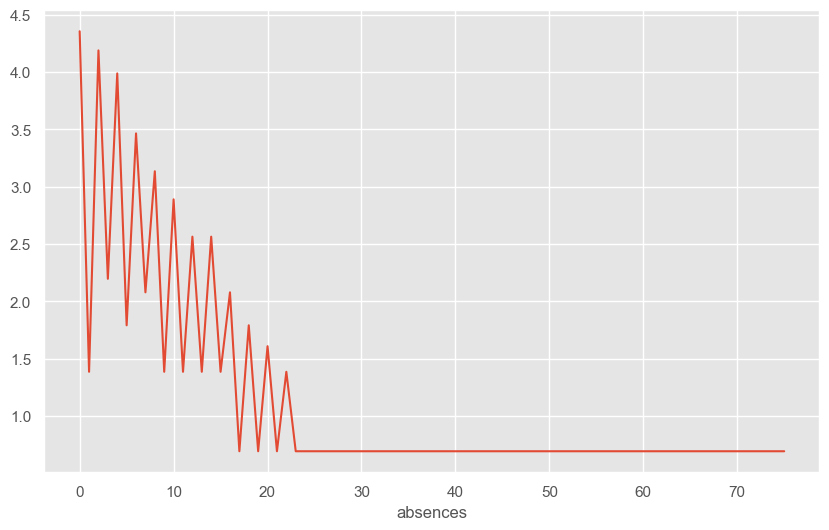

In [225]:
np.log(df.absences.value_counts().sort_index()+1).plot()

In [274]:
df_cleaned.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,FinalGrade
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,16.655462,2.795518,2.546218,1.431373,2.042017,0.271709,3.955182,3.246499,3.098039,1.495798,2.330532,3.549020,6.316527,11.523810
std,1.268262,1.093999,1.084217,0.686075,0.831895,0.671750,0.885721,1.011601,1.090779,0.919886,1.294974,1.402638,8.187623,3.227797
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,4.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,2.000000,9.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,20.000000


<Axes: ylabel='Frequency'>

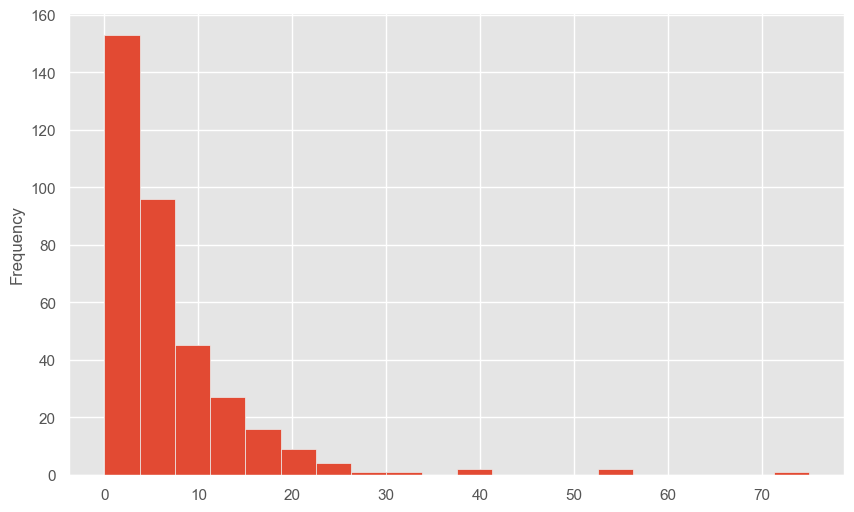

In [293]:
df.absences.plot(kind='hist',bins=20)

In [289]:
np.quantile(df.absences,0.7)

8.0

<Axes: xlabel='FinalGrade'>

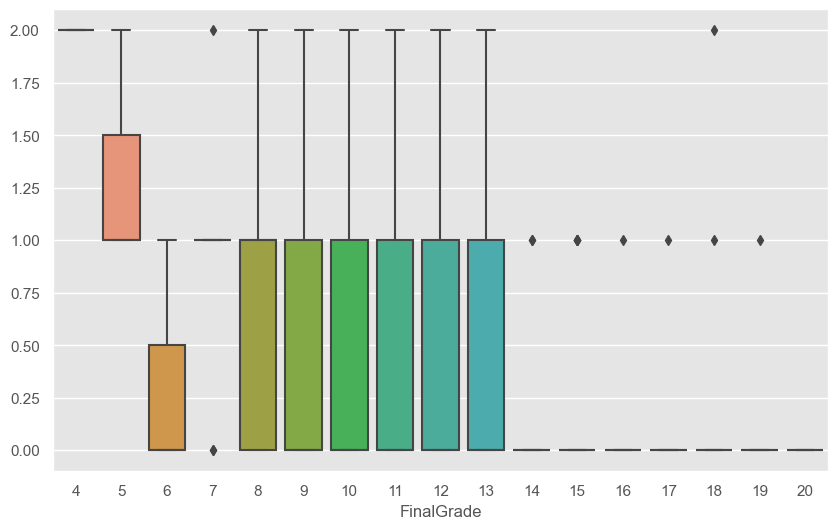

In [358]:
sns.boxplot(y=sc,x=df.FinalGrade)

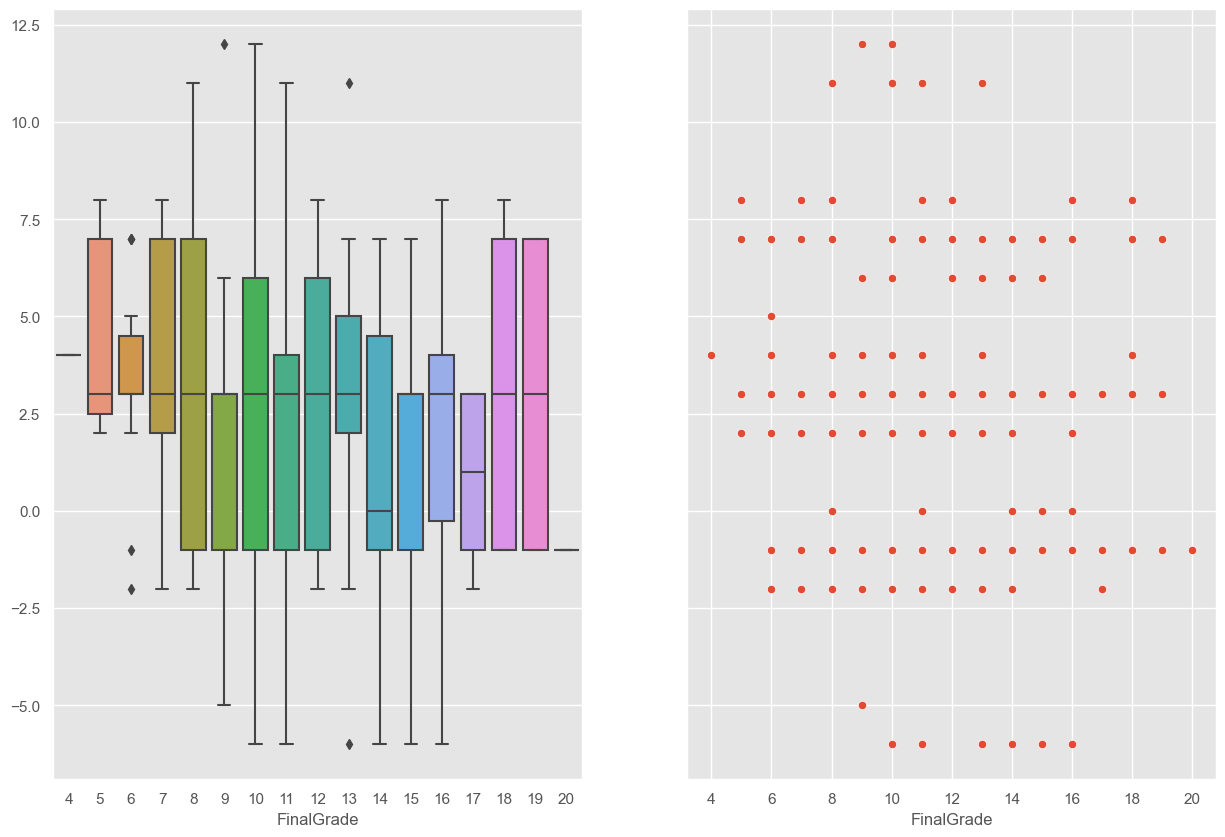

In [456]:
#sc = [(abs(da-5))/(2 if stu==1 else 5 if stu==2 else 10 if stu==3 else 15 if stu==4 else 0) for stu, go, da,wa,i,ab in zip(df["studytime"],df["goout"],df["Dalc"],df["Walc"],df["internet"],df["absences"]) ]
# sc = [3*int(ab>=np.quantile(df.absences,0.3))+int(wa>np.quantile(df.Walc,0.75))-int(wa<=np.quantile(df.Walc,0.25))+int(stu<np.quantile(df.studytime,0.25))-2*int(stu>np.quantile(df.studytime,0.75))+int(go>np.quantile(df.goout,0.5)) for stu, go, da,wa,i,ab,h in zip(df["studytime"],df["goout"],df["Dalc"],df["Walc"],df["internet"],df["absences"], df["health"]) ]

ab = [-1 if x<20 else 0 for x in df.absences]
wa = df.Walc>=4
da = [-1 if x>=2 else 4 for x in df.Dalc]
go = df.goout>=5
stu = [-3 if x>=3 else 4 if x==1 else 0 for x in df.studytime]

sc = ab*1+wa*1+da+go*1+stu

fig,axes =plt.subplots(nrows = 1,ncols= 2 ,figsize=(15,10),sharey=True)
sns.boxplot(y = sc, x = df.FinalGrade,ax=axes[0])
sns.scatterplot(y = sc, x = df.FinalGrade,ax=axes[1]);

In [176]:
df_cleaned.select_dtypes(include=np.number).corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,FinalGrade
age,1.000000,-0.139999,-0.138532,0.106723,0.000447,0.271748,0.066234,0.002889,0.128041,0.142015,0.120844,-0.049694,0.215578,-0.140372
Medu,-0.139999,1.000000,0.608327,-0.177805,0.055764,-0.214681,-0.006585,0.017753,0.078049,0.006122,-0.049314,-0.043790,0.075924,0.190308
Fedu,-0.138532,0.608327,1.000000,-0.185481,-0.028631,-0.262197,-0.009537,-0.023222,0.042474,-0.018816,-0.018914,0.009127,0.008948,0.158811
traveltime,0.106723,-0.177805,-0.185481,1.000000,-0.095827,0.128950,-0.023566,-0.007936,0.037167,0.154209,0.139424,0.001316,0.004628,-0.099785
studytime,0.000447,0.055764,-0.028631,-0.095827,1.000000,-0.131072,0.052122,-0.152533,-0.047891,-0.199821,-0.247601,-0.072786,-0.074541,0.126728
failures,0.271748,-0.214681,-0.262197,0.128950,-0.131072,1.000000,-0.007802,0.103712,0.128388,0.167774,0.174172,0.046940,0.148261,-0.293831
famrel,0.066234,-0.006585,-0.009537,-0.023566,0.052122,-0.007802,1.000000,0.134631,0.030728,-0.079527,-0.126642,0.108042,-0.058076,0.037711
freetime,0.002889,0.017753,-0.023222,-0.007936,-0.152533,0.103712,0.134631,1.000000,0.283519,0.209400,0.132759,0.086485,-0.070492,-0.021589
goout,0.128041,0.078049,0.042474,0.037167,-0.047891,0.128388,0.030728,0.283519,1.000000,0.281761,0.444320,-0.009576,0.056590,-0.177383
Dalc,0.142015,0.006122,-0.018816,0.154209,-0.199821,0.167774,-0.079527,0.209400,0.281761,1.000000,0.644920,0.088875,0.104791,-0.140690


In [213]:
%%time
from sklearn.feature_selection import SequentialFeatureSelector

modelHist = HistGBR()
sfs = SequentialFeatureSelector(modelHist, n_features_to_select='auto',
                                tol = 0.0001,
                                direction='forward', 
                                scoring='r2',
                                cv=3, 
                                n_jobs=-1,)
sfs.fit(X_train_pt, y_train)
print( 'Les variables selectionnées sont :',sfs.get_feature_names_out())

Les variables selectionnées sont : ['num__failures' 'num__Walc' 'cat__sex_M' 'cat__Mjob_other'
 'cat__Mjob_services' 'cat__Fjob_services']
CPU times: total: 219 ms
Wall time: 18.1 s


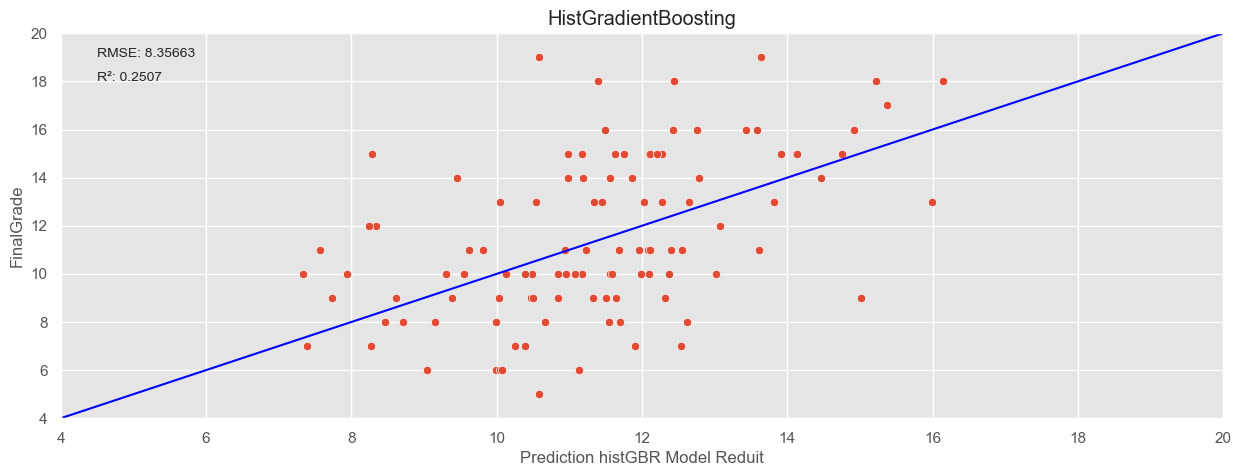

In [214]:
# Application pipeline    
X_test_pt = pd.DataFrame(intermediaire_pipeline.fit_transform(X_test),
                          columns=intermediaire_pipeline.get_feature_names_out()
                         )

modelHist.fit(X_train_pt, y_train)

fig,axes =plt.subplots(nrows = 1,ncols= 1 ,figsize=(15,5),sharey=False)
sns.scatterplot(x = modelHist.predict(X_test_pt),y = y_test)
sns.lineplot(x = range(21),y = range(21),ax=axes, color = 'blue')
plt.title("HistGradientBoosting")
# y-axis
axes.yaxis.set_label_text('FinalGrade')
axes.set_ylim(4,20)

# x-axis
axes.xaxis.set_label_text('Prediction histGBR Model Reduit')
axes.set_xlim(4,20)

# legend
axes.text(4.5, 19, "RMSE: {}".format(mean_squared_error(y_test, modelHist.predict( X_test_pt ) ).round(5)))
axes.text(4.5, 18, "R²: {}".format(modelHist.score(X_test_pt, y_test ).round(4)));

</br>

</br>